In [1]:
library(ggplot2)
library(reshape2)
library(gridExtra)
library(ggplot2)
library(tidyverse)
library(gridExtra)
library(GGally)
library(plotly)
library(corrplot)
library(reshape2)
library(FactoMineR) 
library(factoextra)
library(glmnet) 
library(ggfortify)
library(pROC)
library(ROCR)
library(RColorBrewer)
library(mapview)
library(leaflet)
library(viridis)

── Attaching core tidyverse packages ──────────────────────────────────────────────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ lubridate 1.9.3     ✔ tibble    3.2.1
✔ purrr     1.0.2     ✔ tidyr     1.3.1
── Conflicts ────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::combine() masks gridExtra::combine()
✖ dplyr::filter()  masks stats::filter()
✖ dplyr::lag()     masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2


Attachement du package : 'plotly'


L'objet suivant est masqué depuis 'package:ggplot2':

    last_plot


L'objet suivant est masqué depuis 'package:stats':

    filter


L'objet suivant est masqué depuis 'package:graphics':

    layout


corrplot 0.92 loaded

Welcome! Want to learn more?

In [2]:
# direct loading from stored data on PLMlab
load('data/velib.RData')
summary(velib)
# alternative: load the data from package funFEM, where you have more information (help page)

         Length Class      Mode     
data      181   data.frame list     
position    2   data.frame list     
dates     181   -none-     character
bonus    1189   -none-     numeric  
names    1189   -none-     character

In [3]:
# data preparation
loading = as.matrix(velib$data)
colnames(loading) = 1:ncol(loading)
rownames(loading) = velib$names

stations = 1:nrow(loading)
coord = velib$position[stations,]
coord$bonus = velib$bonus[stations]

# select exactly 7 days of data (we remove the first 13 dates)
dates = 14:181
loading = loading[stations, dates]
colnames(loading) = 1:length(dates)

head(loading)
head(coord)

,1,2,3,4,5,6,7,8,9,10,⋯,159,160,161,162,163,164,165,166,167,168
EURYALE DEHAYNIN,0.03846154,0.03846154,0.07692308,0.03846154,0.03846154,0.03846154,0.03846154,0.03846154,0.10714286,0.00000000,⋯,0.29629630,0.11111111,0.1111111,0.14814815,0.30769231,0.07692308,0.11538462,0.07692308,0.1538462,0.1538462
LEMERCIER,0.47826087,0.47826087,0.47826087,0.43478261,0.43478261,0.43478261,0.43478261,0.43478261,0.26086957,0.04347826,⋯,0.04347826,0.00000000,0.2173913,0.13043478,0.04545455,0.17391304,0.17391304,0.17391304,0.2608696,0.3913043
MEZIERES RENNES,0.21818182,0.14545455,0.12727273,0.10909091,0.10909091,0.10909091,0.09090909,0.09090909,0.05454545,0.10909091,⋯,0.25925926,0.25925926,0.2037037,0.12962963,0.14814815,0.29629630,0.31481481,0.37037037,0.3703704,0.4074074
FARMAN,0.95238095,0.95238095,0.95238095,0.95238095,0.95238095,0.95238095,0.95238095,1.00000000,1.00000000,1.00000000,⋯,1.00000000,1.00000000,0.9047619,0.85714286,0.85714286,0.85714286,0.76190476,0.76190476,0.7619048,0.7619048
QUAI DE LA RAPEE,0.92753623,0.81159420,0.73913043,0.72463768,0.72463768,0.72463768,0.72463768,0.72463768,0.75362319,0.97101449,⋯,0.22727273,0.45454545,0.5909091,0.83333333,1.00000000,0.81818182,0.63636364,0.71212121,0.6212121,0.5757576
CHOISY POINT D'IVRY,0.16666667,0.16666667,0.16666667,0.16666667,0.16666667,0.16666667,0.16666667,0.16666667,0.08333333,0.00000000,⋯,0.34782609,0.08695652,0.1153846,0.08695652,0.13043478,0.08695652,0.08695652,0.43478261,0.3913043,0.5217391


,longitude,latitude,bonus
,<dbl>,<dbl>,<dbl>
19117,2.377389,48.88630,0
17111,2.317591,48.89002,0
6103,2.330447,48.85030,0
15042,2.271396,48.83373,0
12003,2.366897,48.84589,0
13038,2.363335,48.82191,0


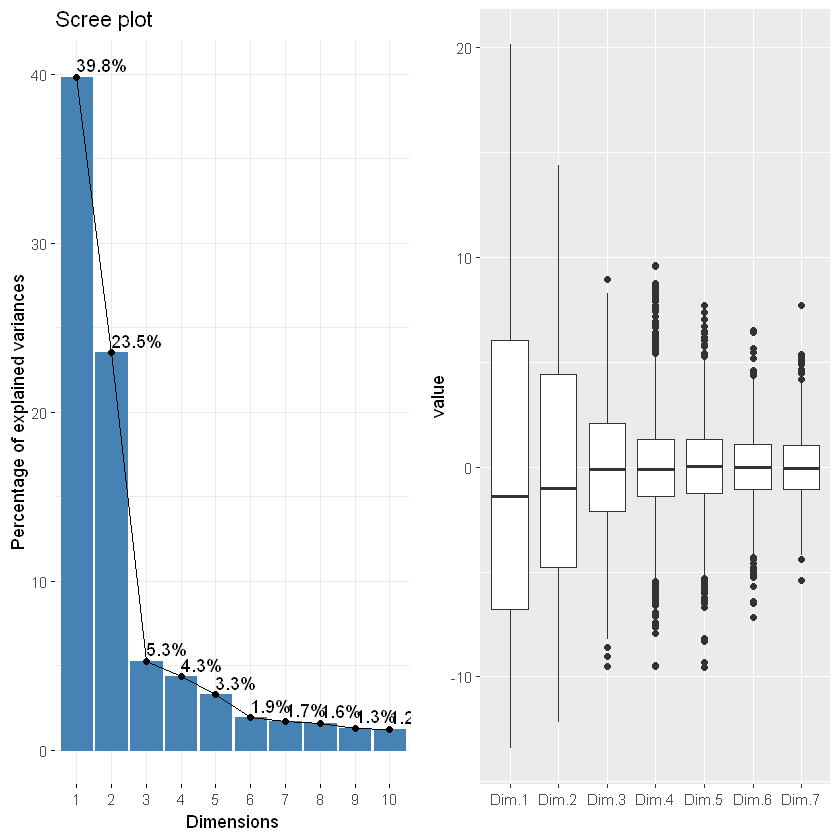

In [4]:
loading <- as.data.frame(loading)
loading$Hill <- as.factor(coord$bonus)
acp <- PCA(loading, scale.unit = TRUE,
           graph = FALSE, quali.sup=169, ncp = 7)
g1<-fviz_eig(acp, addlabels = TRUE, ylim = c(0, 40))
library(reshape2)
g2<-ggplot(melt(acp$ind$coord),aes(x=Var2,y=value))+
  geom_boxplot()+
  xlab("")
grid.arrange(g1,g2,ncol=2)

In [5]:
minuit_am <- rowMeans(loading[,c(1,25,49,73,97,121,145)])
une_am <- rowMeans(loading[,c(2,26,50,74,98,122,146)])
deux_am <- rowMeans(loading[,c(3,27,51,75,99,123,147)])
trois_am <- rowMeans(loading[,c(4,28,52,76,100,124,148)])
quatre_am <- rowMeans(loading[,c(5,29,53,77,101,125,149)])
cinq_am <- rowMeans(loading[,c(6,30,54,78,102,126,150)])
six_am <- rowMeans(loading[,c(7,31,55,79,103,127,151)])
sept_am <- rowMeans(loading[,c(8,32,56,80,104,128,152)])
huit_am <- rowMeans(loading[,c(9,33,57,81,105,129,153)])
neuf_am <- rowMeans(loading[,c(10,34,58,82,106,130,154)])
dix_am <- rowMeans(loading[,c(11,35,59,83,107,131,155)])
onze_am <- rowMeans(loading[,c(12,36,60,84,108,132,156)])
minuit_pm <- rowMeans(loading[,c(13,37,61,85,109,133,157)])
une_pm <- rowMeans(loading[,c(14,38,62,86,110,134,158)])
deux_pm <- rowMeans(loading[,c(15,39,63,87,111,135,159)])
trois_pm <- rowMeans(loading[,c(16,40,64,88,112,136,160)])
quatre_pm <- rowMeans(loading[,c(17,41,65,89,113,137,161)])
cinq_pm <- rowMeans(loading[,c(18,42,66,90,114,138,162)])
six_pm <- rowMeans(loading[,c(19,43,67,91,115,139,163)])
sept_pm <- rowMeans(loading[,c(20,44,68,92,116,140,164)])
huit_pm <- rowMeans(loading[,c(21,45,69,93,117,141,165)])
neuf_pm <- rowMeans(loading[,c(22,46,70,94,118,142,166)])
dix_pm <- rowMeans(loading[,c(23,47,71,95,119,143,167)])
onze_pm <- rowMeans(loading[,c(24,48,72,96,120,144,168)])

df1 <- data.frame(Minuit = minuit_am, "une h" = une_am, "2h" = deux_am, "3h" = trois_am, "4h" = quatre_am, "5h" = cinq_am, "6h" = six_am, "7h" = sept_am, "8h" = huit_am, "9h" = neuf_am
                 , "10h" = dix_am, "11h" = onze_am, "12h" = minuit_pm, "13h" = une_pm, "14h" = deux_pm, "15h" = trois_pm, "16h" = quatre_pm, "17h" = cinq_pm, "18h" = six_pm, 
                 "19h" = sept_pm, "20h" = huit_pm, "21h" = neuf_pm, "22h" = dix_pm, "23h" = onze_pm)

colnames(df1) <- list("0h", "1h", "2h","3h", "4h", "5h", "6h", "7h", "8h", "9h", "10h", "11h", "12h", "13h", "14h", "15h", "16h", "17h", "18h", "19h", "20h", "21h", "22h", "23h")
df1$Station <- velib$names
df1$Hill <- as.factor(coord$bonus)
df1$Station <- as.factor(df1$Station)
head(df1)

,0h,1h,2h,3h,4h,5h,6h,7h,8h,9h,⋯,16h,17h,18h,19h,20h,21h,22h,23h,Station,Hill
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<fct>
X.EURYALE.DEHAYNIN,0.3174749,0.3316472,0.3639746,0.3839903,0.3951393,0.4000523,0.4106343,0.3843683,0.3996599,0.1249055,⋯,0.05158730,0.06216931,0.1724519,0.2515408,0.5242311,0.5019187,0.5754550,0.5119629,EURYALE DEHAYNIN,0
X.LEMERCIER,0.8385093,0.8260870,0.8074534,0.8198758,0.8260870,0.8260870,0.8260870,0.8136646,0.6956522,0.2298137,⋯,0.09937888,0.12422360,0.1431395,0.4409938,0.7204969,0.7391304,0.7888199,0.8074534,LEMERCIER,0
X.MEZIERES.RENNES,0.4757743,0.4134847,0.3914403,0.3887948,0.3756635,0.3548842,0.3522868,0.3524311,0.2828659,0.3371813,⋯,0.57743480,0.59124579,0.5814125,0.5651965,0.5287513,0.5691700,0.5728799,0.5572558,MEZIERES RENNES,0
X.FARMAN,0.2312925,0.2380952,0.2312925,0.2517007,0.2517007,0.2517007,0.2517007,0.2811791,0.4565826,0.7823129,⋯,0.73809524,0.63605442,0.2664399,0.2312925,0.2335601,0.2108844,0.2040816,0.1972789,FARMAN,0
X.QUAI.DE.LA.RAPEE,0.5578916,0.5081458,0.4617051,0.4190691,0.3768585,0.3475134,0.3139657,0.3111874,0.3011764,0.4912834,⋯,0.74598169,0.73575961,0.6653876,0.5577936,0.4690331,0.5199493,0.5043376,0.5094532,QUAI DE LA RAPEE,0
X.CHOISY.POINT.D.IVRY,0.4001035,0.4653209,0.4593685,0.4831781,0.4764493,0.4945652,0.5007764,0.4169255,0.3276398,0.1669255,⋯,0.21886447,0.26371636,0.1863354,0.4138199,0.3713768,0.4492754,0.4252070,0.4679089,CHOISY POINT D'IVRY,0


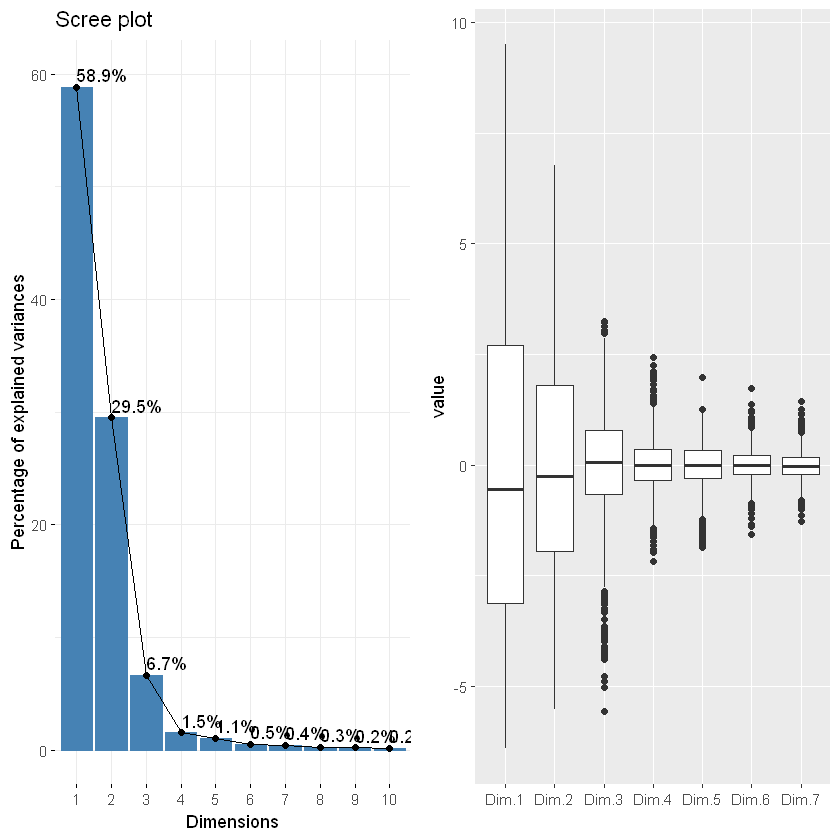

In [6]:
acp1 <- PCA(df1, scale.unit = TRUE,
           graph = FALSE, quali.sup = c(25,26), ncp = 7)
g1<-fviz_eig(acp1, addlabels = TRUE, ylim = c(0, 60))
g2<-ggplot(melt(acp1$ind$coord),aes(x=Var2,y=value))+
  geom_boxplot()+
  xlab("")
grid.arrange(g1,g2,ncol=2)

In [7]:
lundi <- rowMeans(loading[,c(1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24)])
mardi <- rowMeans(loading[,c(25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48)])
mercredi <- rowMeans(loading[,c(49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72)])
jeudi <- rowMeans(loading[,c(73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96)])
vendredi <- rowMeans(loading[,c(97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120)])
samedi <- rowMeans(loading[,c(121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144)])
dimanche <- rowMeans(loading[,c(145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168)])

df2 <- data.frame(lundi,mardi,mercredi,jeudi,vendredi,samedi,dimanche)

colnames(df2) <- list("Lundi","Mardi","Mercredi","Jeudi","Vendredi","Samedi","Dimanche")
df2$Station <- velib$names
df2$Hill <- as.factor(coord$bonus)
df2$Station <- as.factor(df2$Station)
head(df2)

,Lundi,Mardi,Mercredi,Jeudi,Vendredi,Samedi,Dimanche,Station,Hill
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<fct>
X.EURYALE.DEHAYNIN,0.1111493,0.2964616,0.3785273,0.3613867,0.4185957,0.2448192,0.1340812,EURYALE DEHAYNIN,0
X.LEMERCIER,0.3423913,0.5797101,0.5108696,0.5724638,0.5289855,0.6050725,0.4040679,LEMERCIER,0
X.MEZIERES.RENNES,0.2738741,0.6266798,0.3893939,0.4568182,0.5717312,0.5321409,0.4166667,MEZIERES RENNES,0
X.FARMAN,0.7599206,0.3670635,0.3091931,0.3302599,0.3115079,0.3115079,0.6527778,FARMAN,0
X.QUAI.DE.LA.RAPEE,0.7366092,0.6083758,0.5507157,0.4502161,0.5980819,0.3568320,0.4084596,QUAI DE LA RAPEE,0
X.CHOISY.POINT.D.IVRY,0.2031250,0.4548611,0.3645833,0.3489583,0.2588315,0.6255284,0.1678512,CHOISY POINT D'IVRY,0


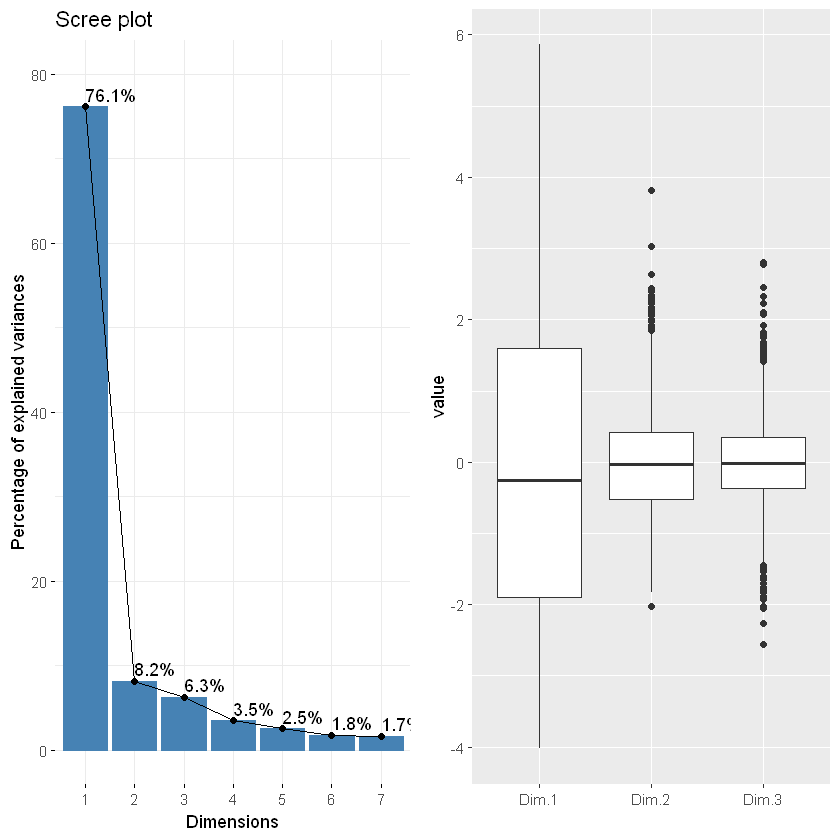

In [8]:
acp2 <- PCA(df2, scale.unit = TRUE,
           graph = FALSE, quali.sup = c(8,9), ncp = 3)
g1<-fviz_eig(acp2, addlabels = TRUE, ylim = c(0, 80))
g2<-ggplot(melt(acp2$ind$coord),aes(x=Var2,y=value))+
  geom_boxplot()+
  xlab("")
grid.arrange(g1,g2,ncol=2)

In [9]:
library(cluster)

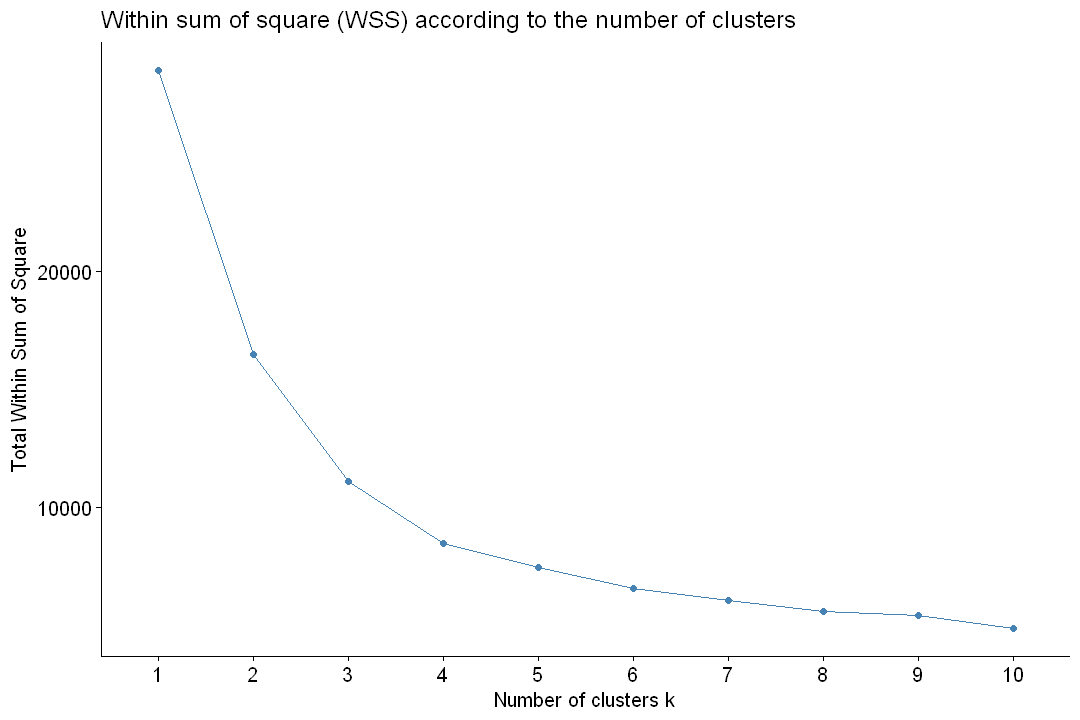

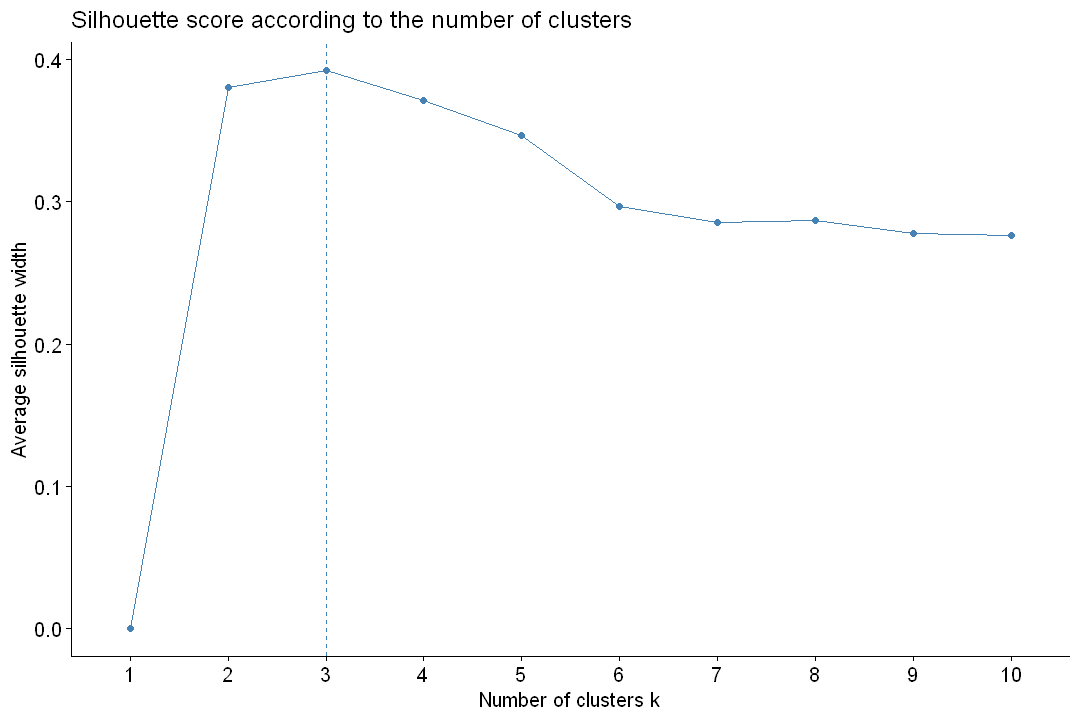

In [12]:
options(repr.plot.width = 9, repr.plot.height = 6)

fviz_nbclust(df12[,-c(25,26)], FUNcluster=kmeans, method="wss") +
    ggtitle("Within sum of square (WSS) according to the number of clusters")

fviz_nbclust(df12[,-c(25,26)], FUNcluster=kmeans, method="silhouette") +
    ggtitle("Silhouette score according to the number of clusters")

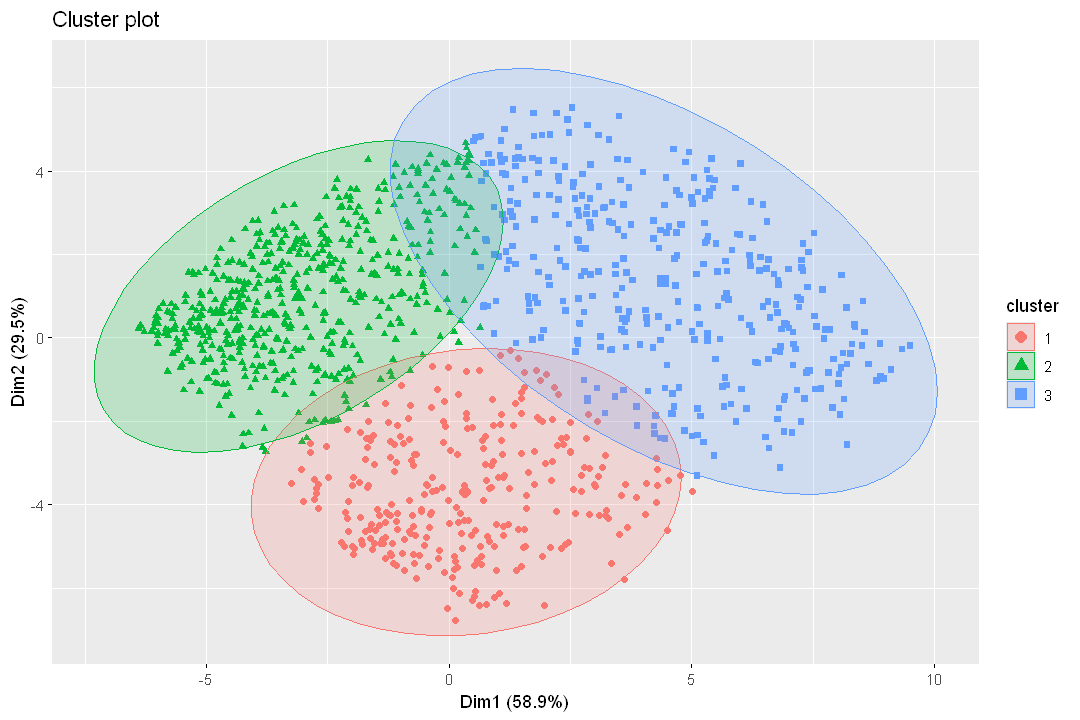

In [11]:
df12 = df1
df12[,-c(25,26)] = scale(df1[,-c(25,26)], scale=T, center=T)
reskmeans = kmeans(df12[,-c(25,26)], centers=3) 

fviz_cluster(reskmeans, data=df12[,-c(25,26)], ellipse.type="norm", labelsize=8, geom=c("point"))

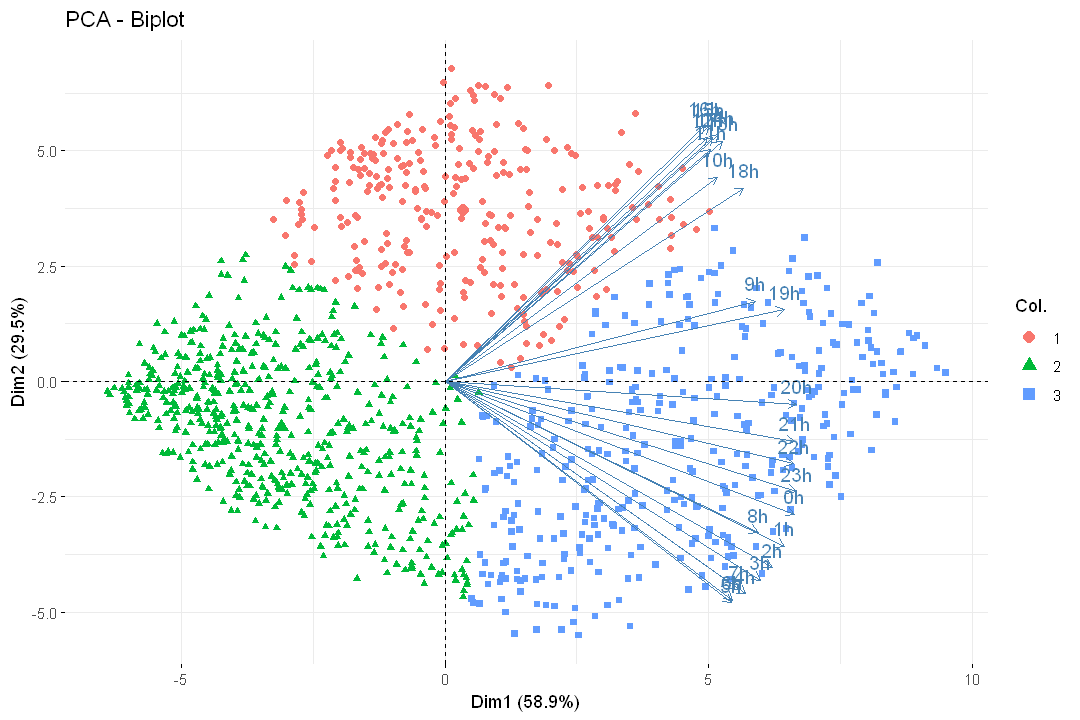

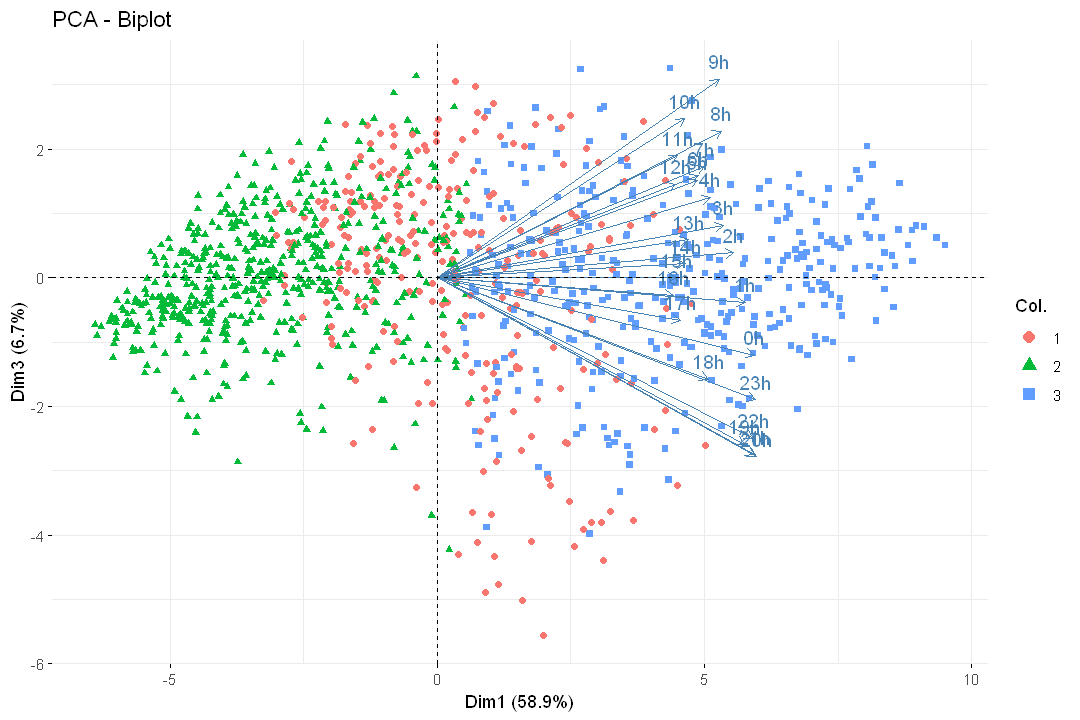

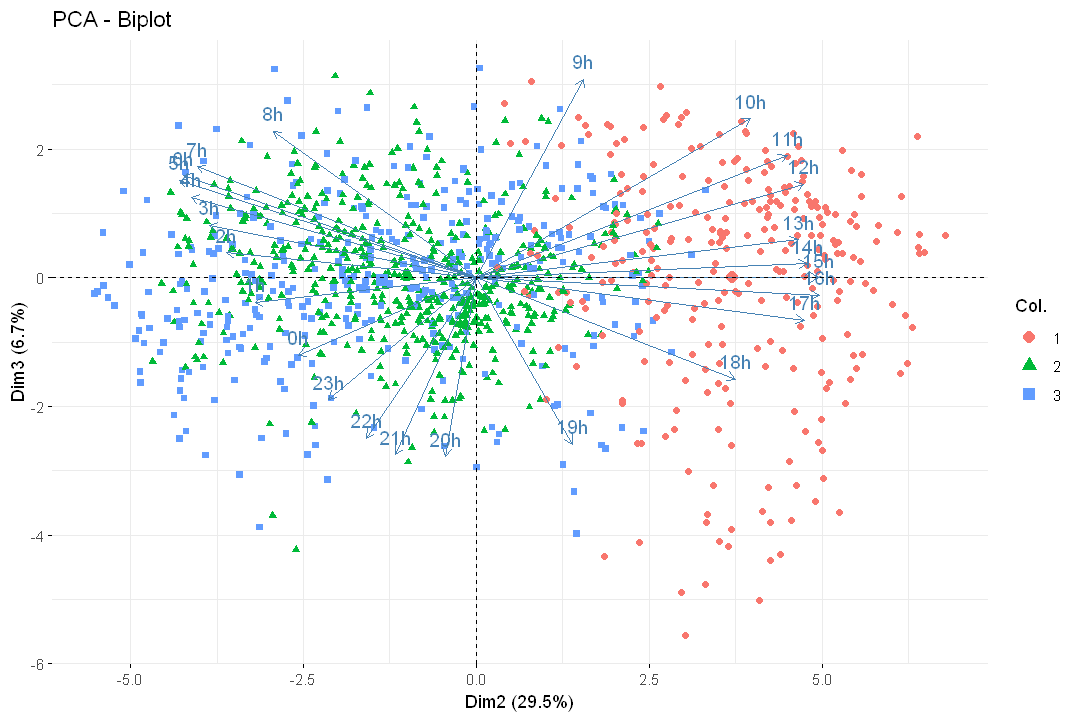

In [13]:
options(repr.plot.width = 9, repr.plot.height = 6)


fviz_pca(acp1, axes=c(1,2), geom = c("point"), col.ind=as.factor(reskmeans$cluster))
fviz_pca(acp1, axes=c(1,3), geom=c("point"), col.ind=as.factor(reskmeans$cluster))
fviz_pca(acp1, axes=c(2,3), geom=c("point"), col.ind=as.factor(reskmeans$cluster))

In [14]:
cluster_palette <- colorFactor(c("#E41A1C","#4DAF4A","#377EB8"), domain = unique(reskmeans$cluster))  # Utiliser la palette viridis avec 10 couleurs

leaflet(velib$position) %>% 
  addTiles(urlTemplate = "https://{s}.basemaps.cartocdn.com/light_all/{z}/{x}/{y}{r}.png", 
           attribution = 'Map tiles by Carto, under CC BY 3.0. Data by OpenStreetMap, under ODbL.') %>% 
  addCircleMarkers(radius = 3,
                   color = ~cluster_palette(reskmeans$cluster),
                   stroke = FALSE, 
                   fillOpacity = 0.9) %>%
addLegend(position = "bottomright", 
            pal = cluster_palette, 
            values = ~reskmeans$cluster,
            title = "Cluster",
            opacity = 1)

HTML widgets cannot be represented in plain text (need html)

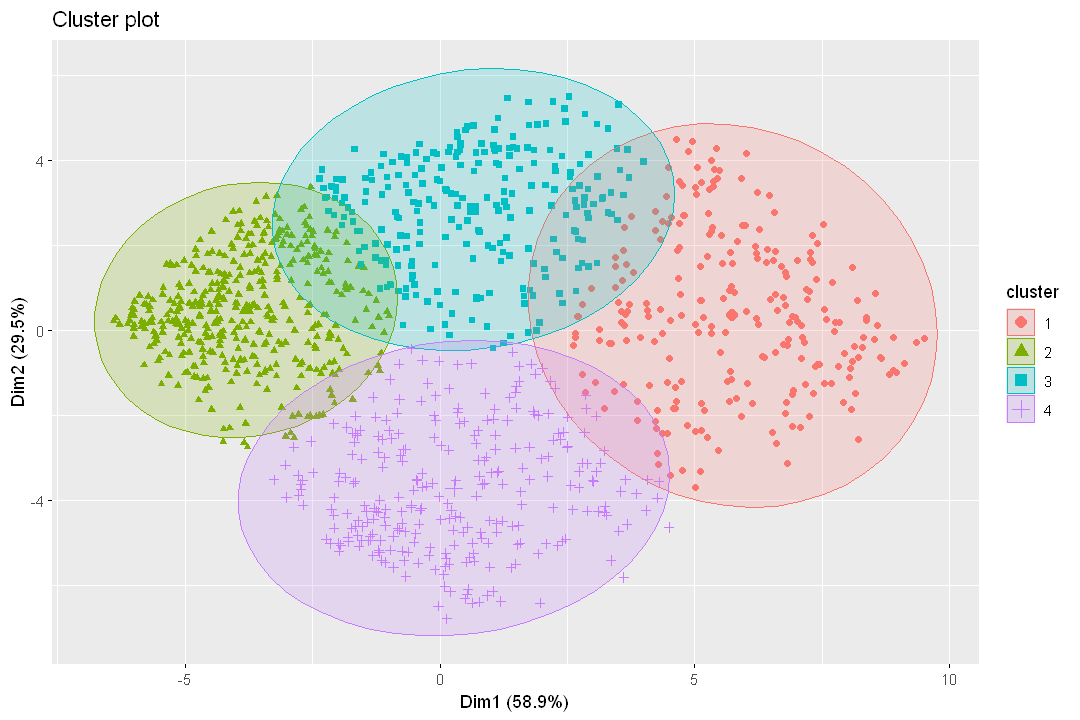

In [15]:
df12 = df1
df12[,-c(25,26)] = scale(df1[,-c(25,26)], scale=T, center=T)
reskmeans = kmeans(df12[,-c(25,26)], centers=4) 

fviz_cluster(reskmeans, data=df12[,-c(25,26)], ellipse.type="norm", labelsize=8, geom=c("point"))

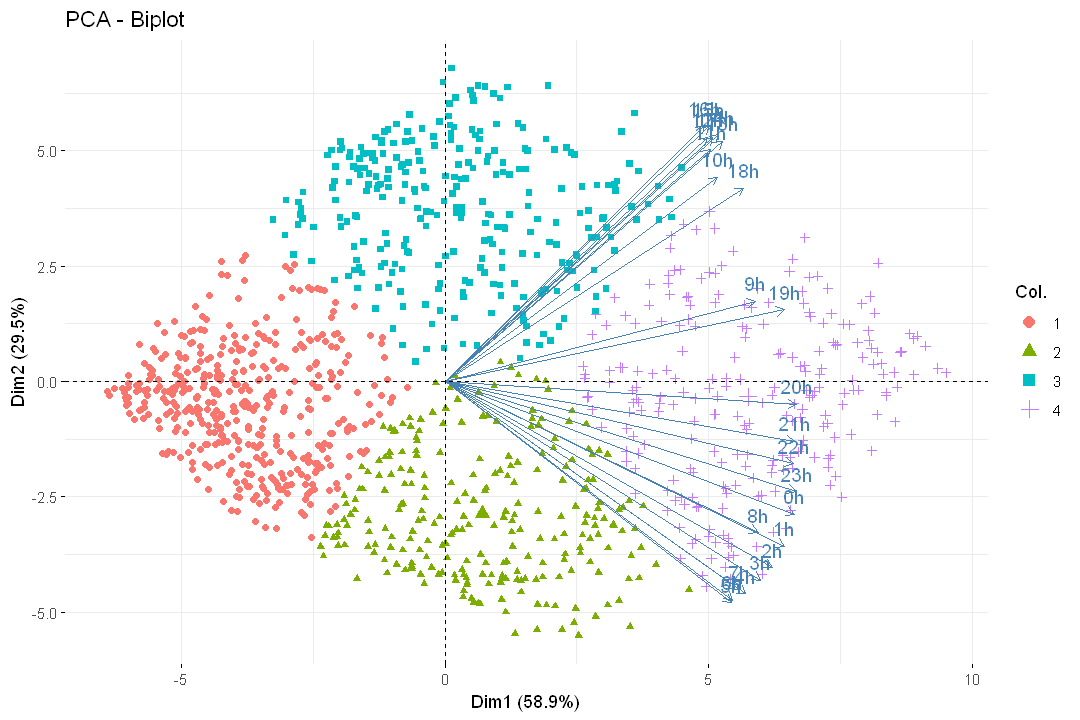

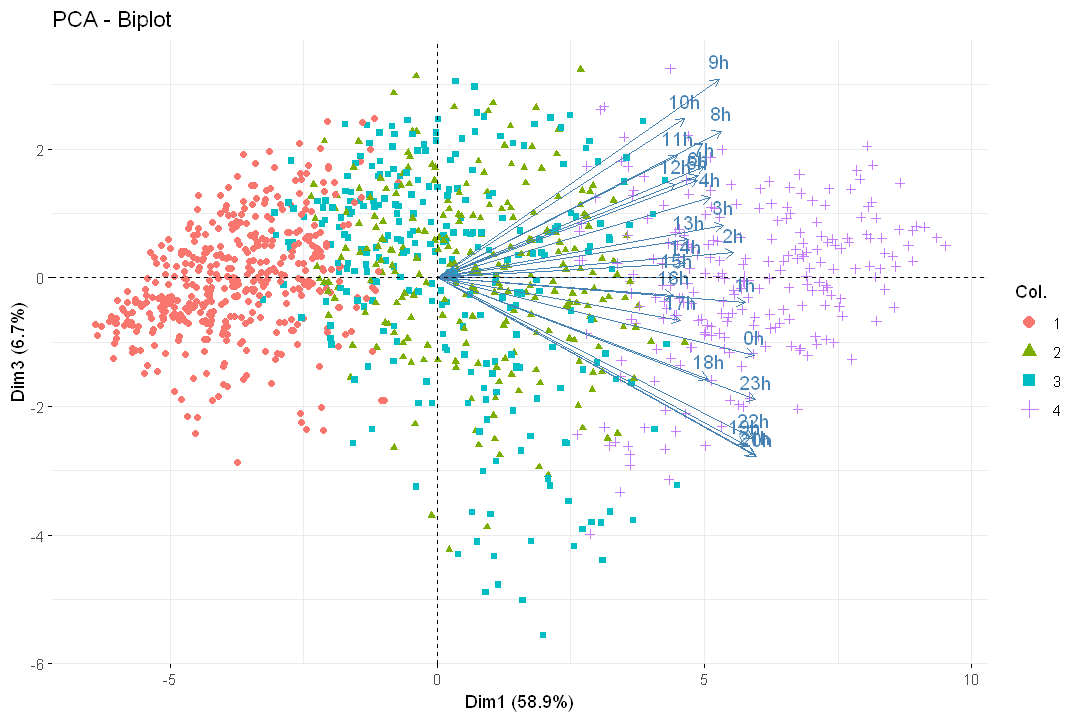

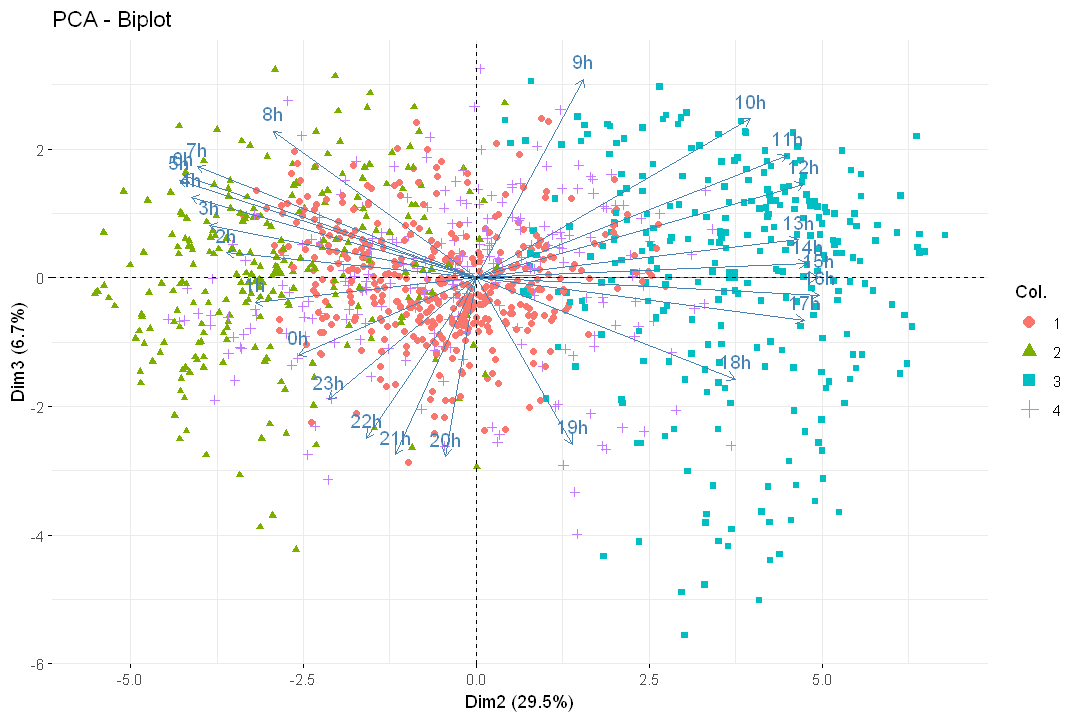

In [18]:
options(repr.plot.width = 9, repr.plot.height = 6)


fviz_pca(acp1, axes=c(1,2), geom = c("point"), col.ind=as.factor(reskmeans$cluster))
fviz_pca(acp1, axes=c(1,3), geom=c("point"), col.ind=as.factor(reskmeans$cluster))
fviz_pca(acp1, axes=c(2,3), geom=c("point"), col.ind=as.factor(reskmeans$cluster))

In [19]:
#######
cluster_palette <- colorFactor(c("#E41A1C","#377EB8","#4DAF4A","#FF7F00"), domain = unique(reskmeans$cluster))  # Utiliser la palette viridis avec 10 couleurs

leaflet(velib$position) %>% 
  addTiles(urlTemplate = "https://{s}.basemaps.cartocdn.com/light_all/{z}/{x}/{y}{r}.png", 
           attribution = 'Map tiles by Carto, under CC BY 3.0. Data by OpenStreetMap, under ODbL.') %>% 
  addCircleMarkers(radius = 3,
                   color = ~cluster_palette(reskmeans$cluster),
                   stroke = FALSE, 
                   fillOpacity = 0.9) %>%
addLegend(position = "bottomright", 
            pal = cluster_palette, 
            values = ~reskmeans$cluster,
            title = "Cluster",
            opacity = 1)

HTML widgets cannot be represented in plain text (need html)

Warning message:
"The `<scale>` argument of `guides()` cannot be `FALSE`. Use "none" instead as of ggplot2 3.3.4.
ℹ The deprecated feature was likely used in the factoextra package.
  Please report the issue at <https://github.com/kassambara/factoextra/issues>."


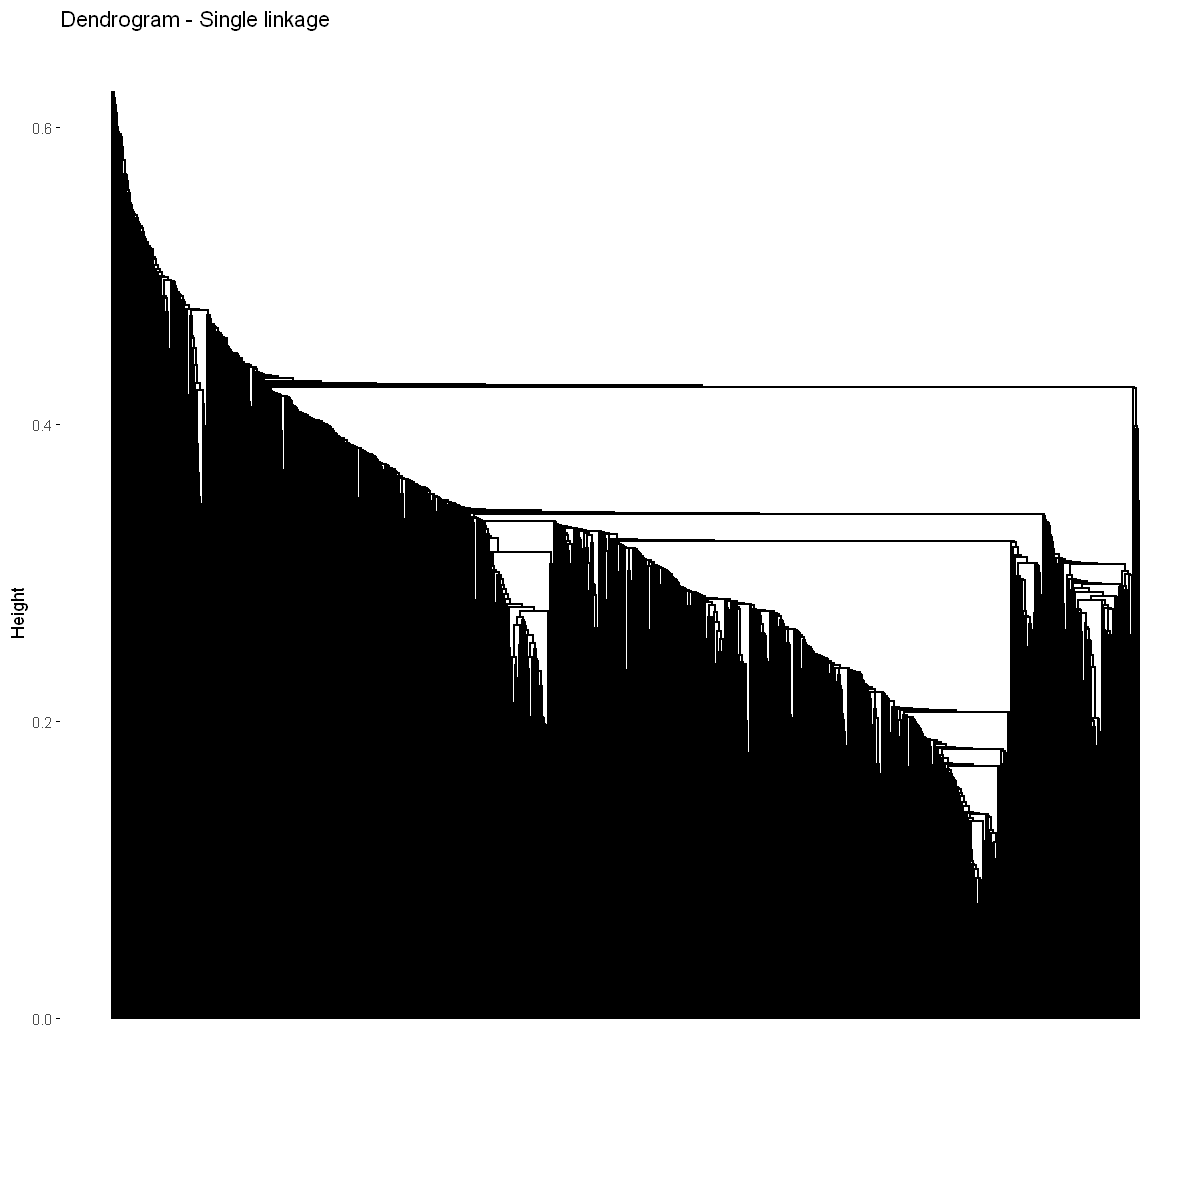

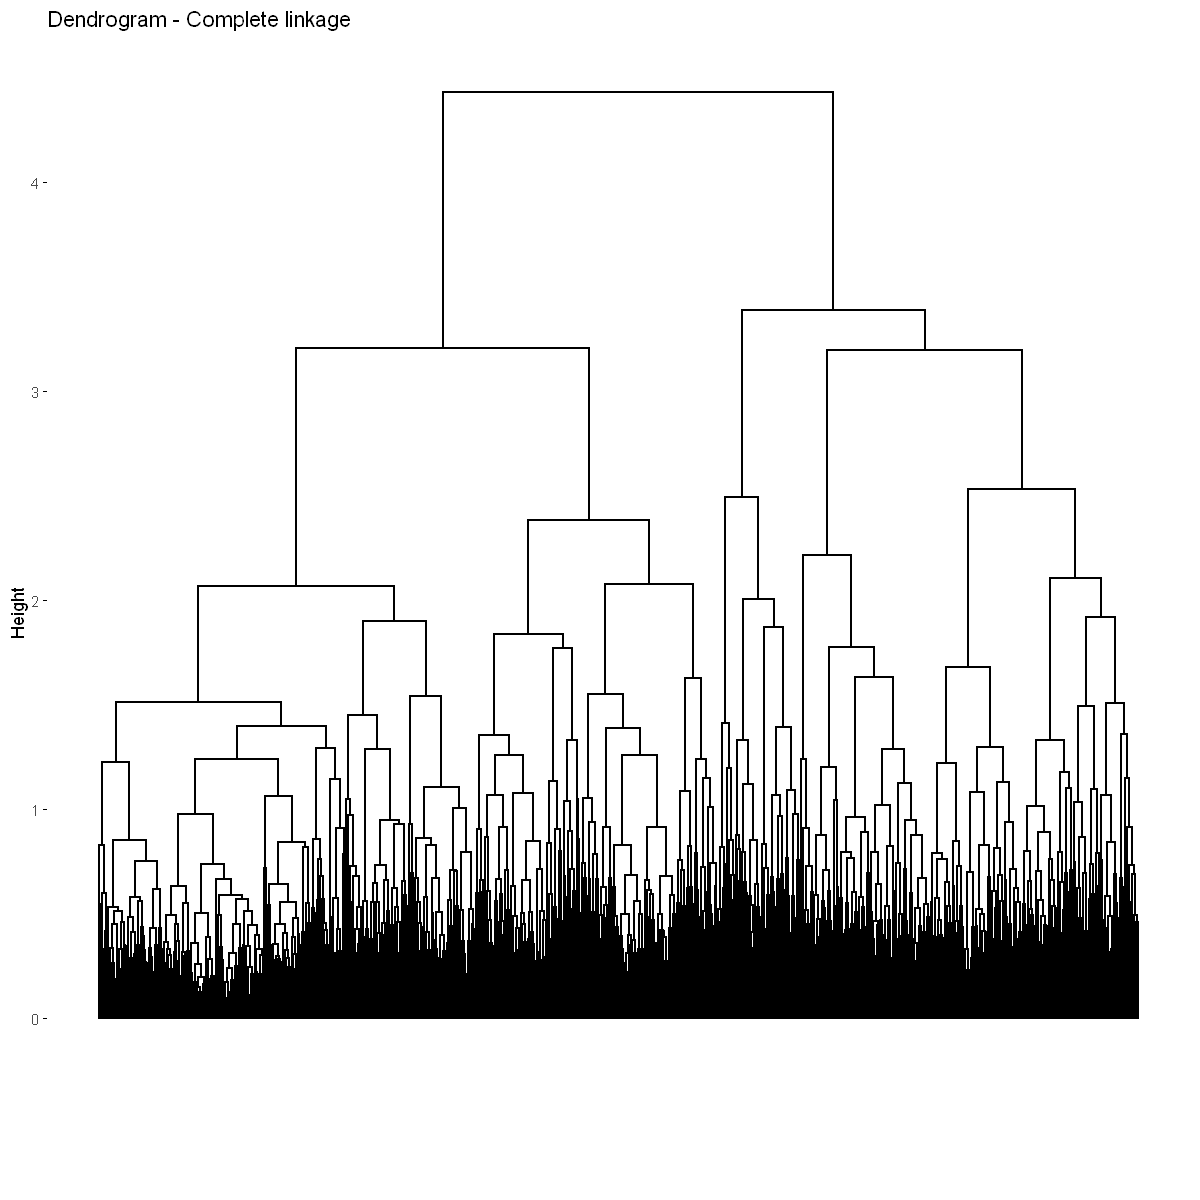

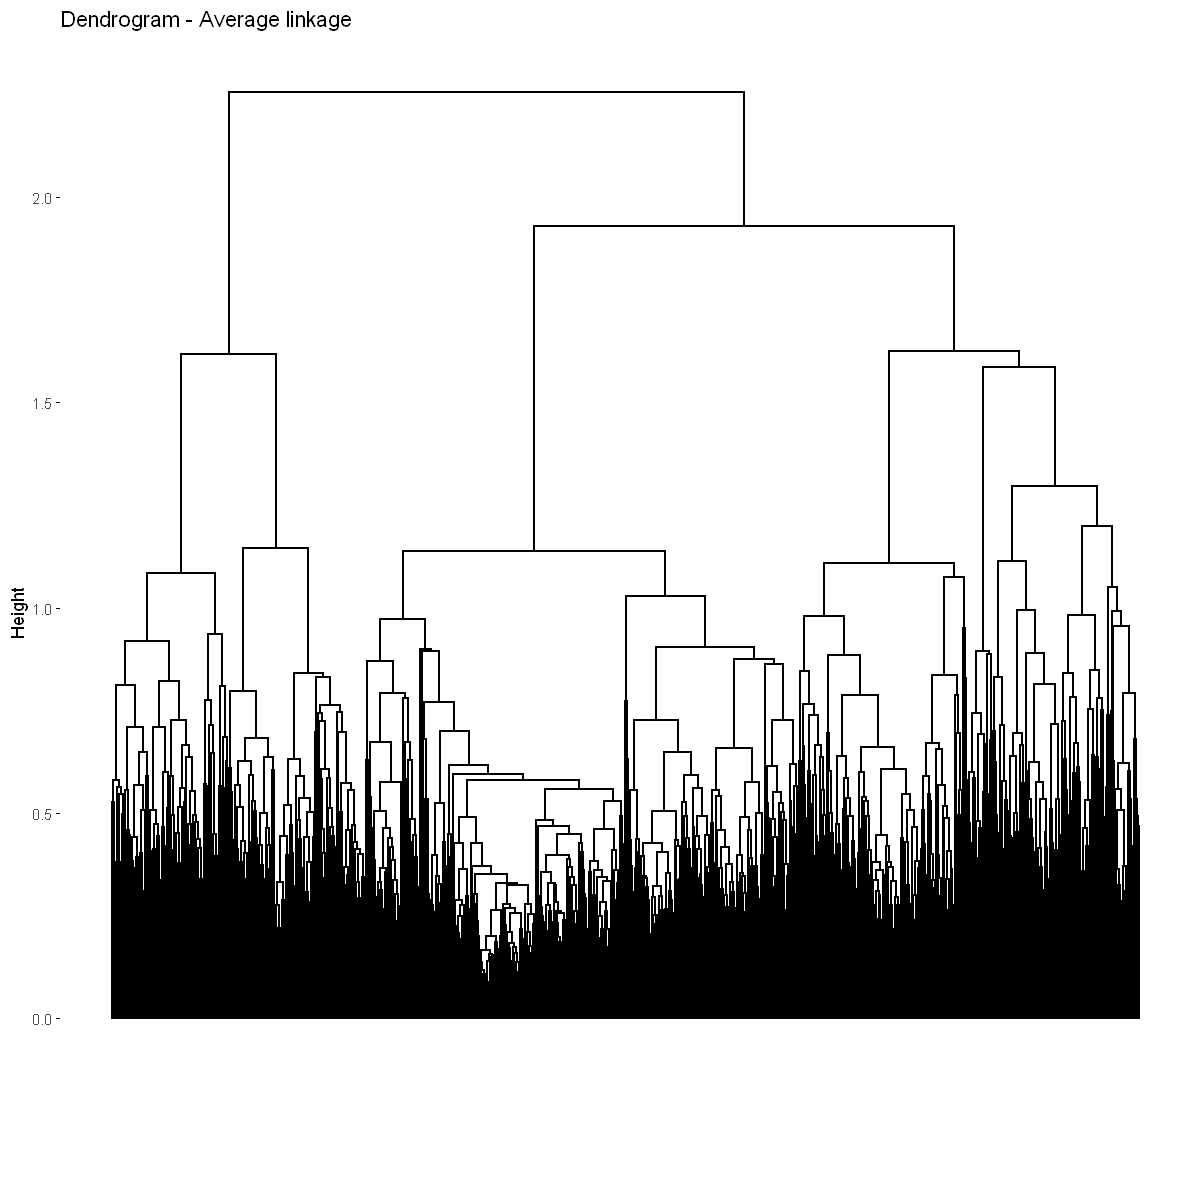

In [9]:
d = dist(df1[,-c(25,26)], method="euclidean")

# Clustering
hclustsingle = hclust(d, method="single")
hclustcomplete = hclust(d, method="complete")
hclustaverage = hclust(d, method="average")

# --- #
#Dendograms visualization
options(repr.plot.width=10, repr.plot.height=10)

fviz_dend(hclustsingle, show_labels=FALSE, main='Dendrogram - Single linkage')
fviz_dend(hclustcomplete, show_labels=FALSE, main='Dendrogram - Complete linkage')
fviz_dend(hclustaverage, show_labels=FALSE, main='Dendrogram - Average linkage')

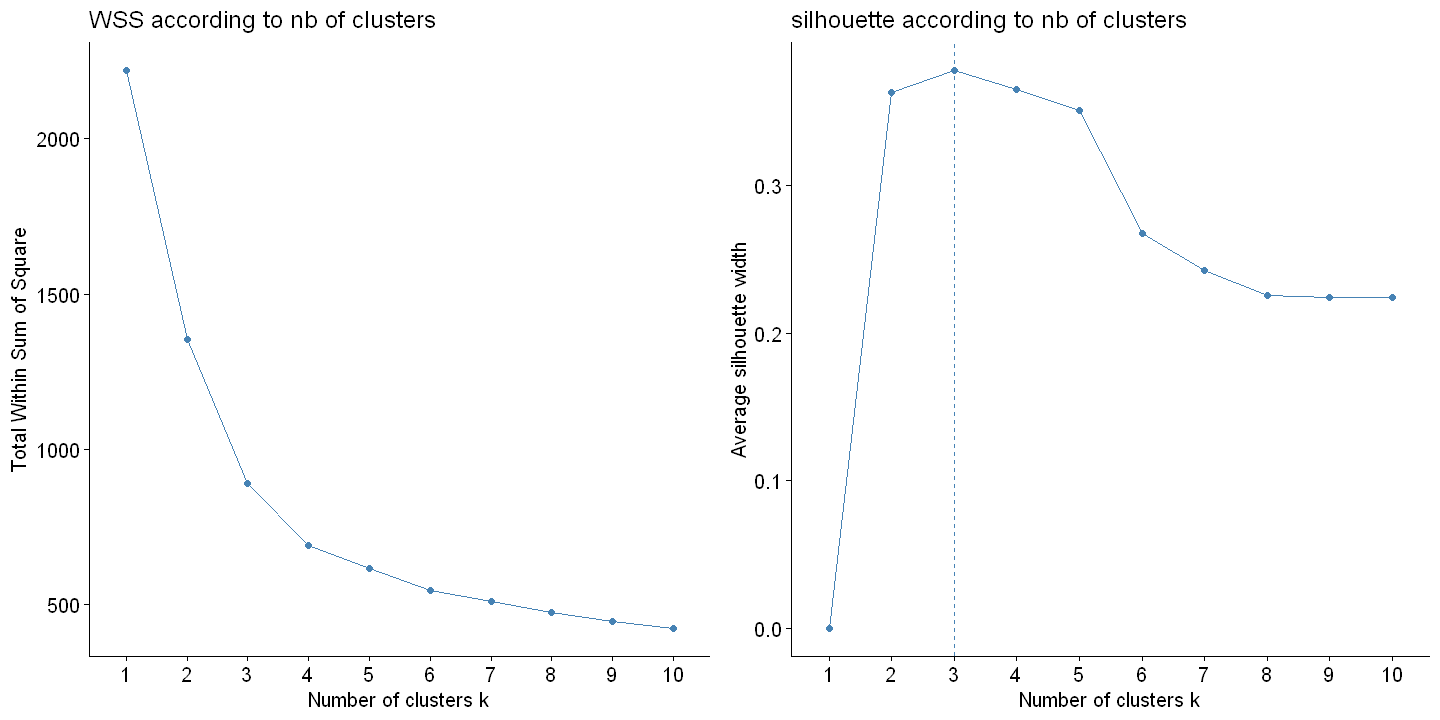

In [10]:
options(repr.plot.width = 12, repr.plot.height = 6)

grid.arrange(
    fviz_nbclust(df1[,-c(25,26)], FUNcluster=hcut, method="wss") + ggtitle("WSS according to nb of clusters"),
    fviz_nbclust(df1[,-c(25,26)], FUNcluster=hcut, method="silhouette") + ggtitle("silhouette according to nb of clusters"),
    ncol=2
)

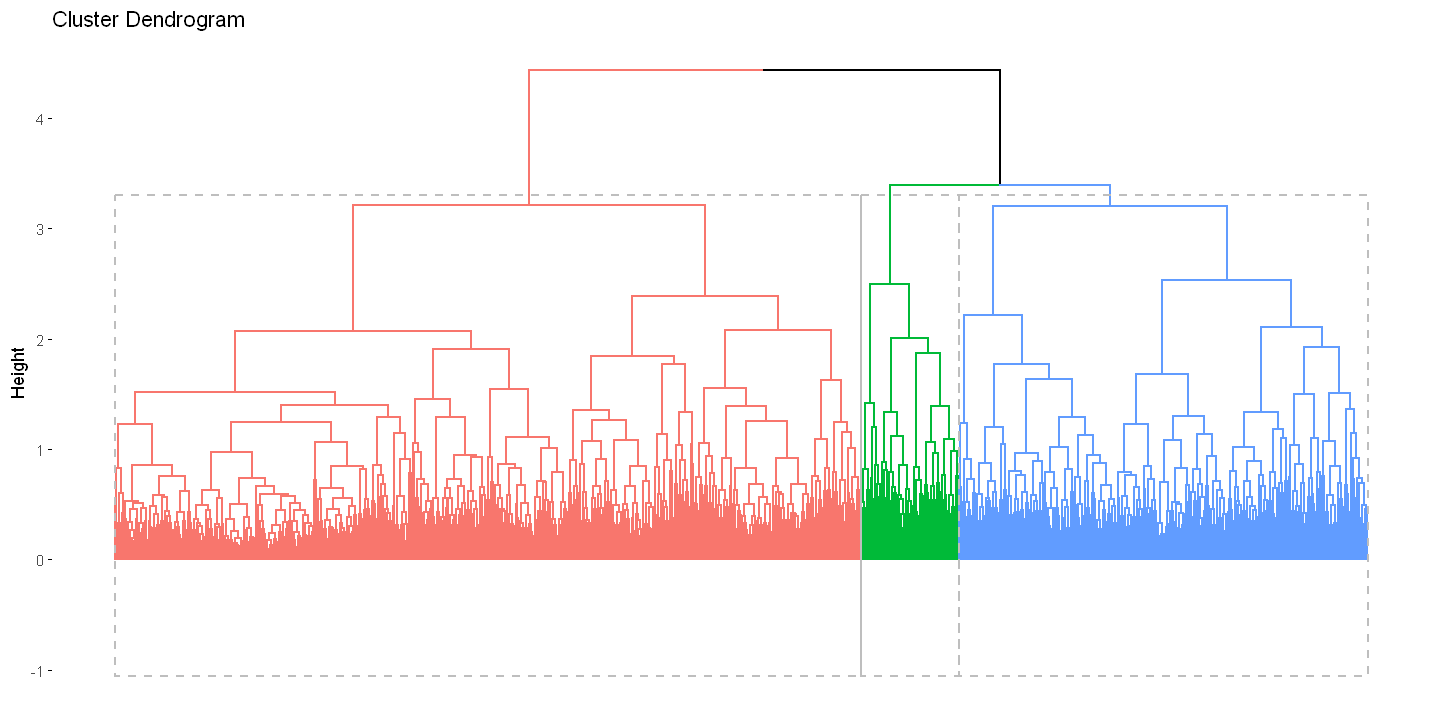

In [14]:
reshclust = cutree(hclustcomplete, 3)

# --- #

fviz_dend(hclustcomplete, k=3, show_labels=FALSE, rect=TRUE)

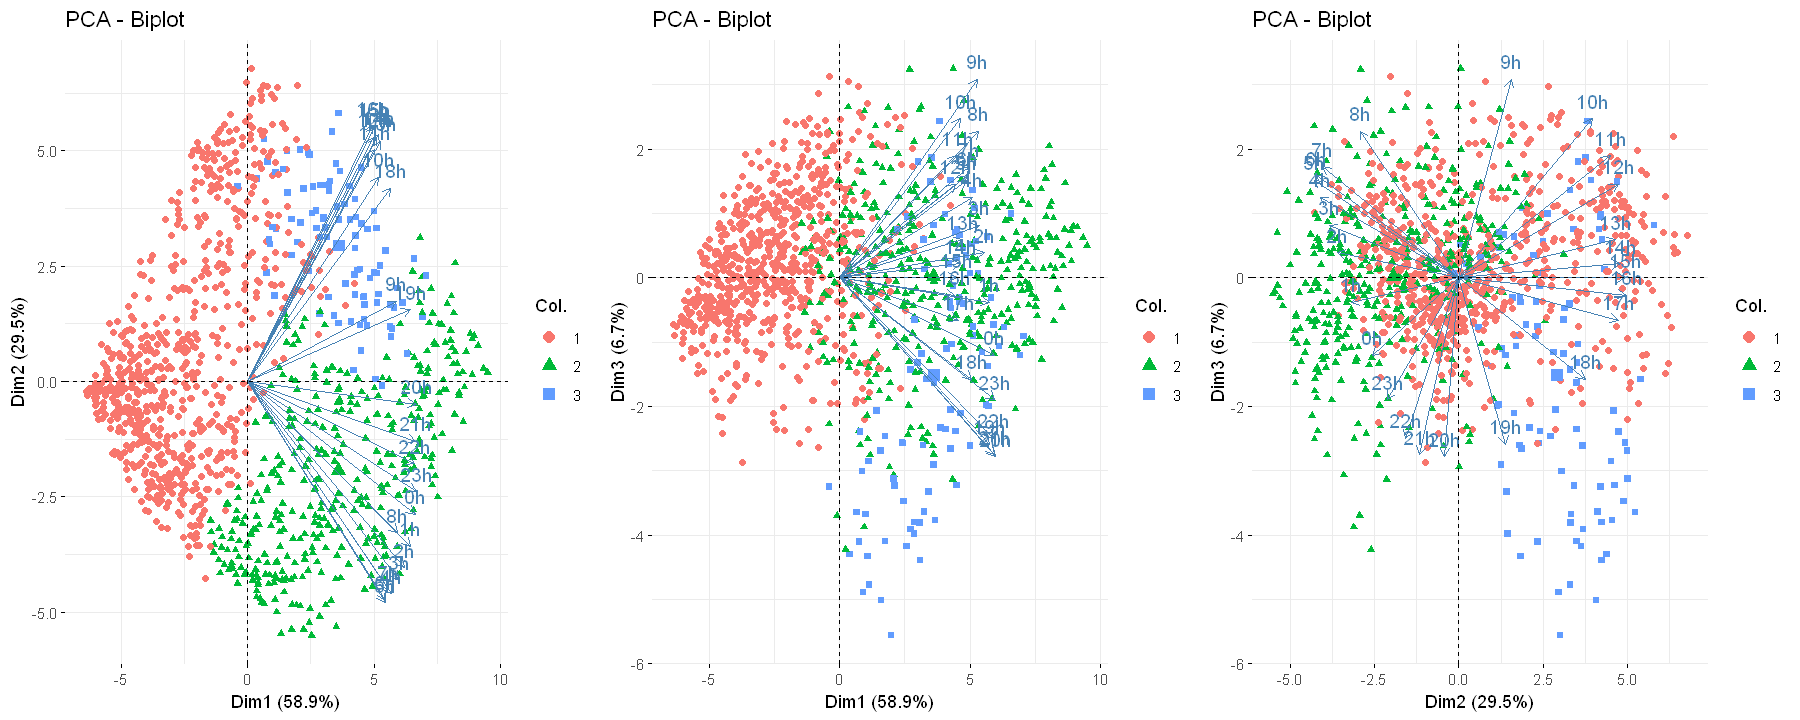

In [17]:
options(repr.plot.width = 15, repr.plot.height = 6)

grid.arrange(
    fviz_pca(acp1, axes=c(1,2), geom = c("point"), col.ind=as.factor(reshclust)),
    fviz_pca(acp1, axes=c(1,3), geom = c("point"), col.ind=as.factor(reshclust)),
    fviz_pca(acp1, axes=c(2,3), geom = c("point"), col.ind=as.factor(reshclust)),
    ncol=3
)

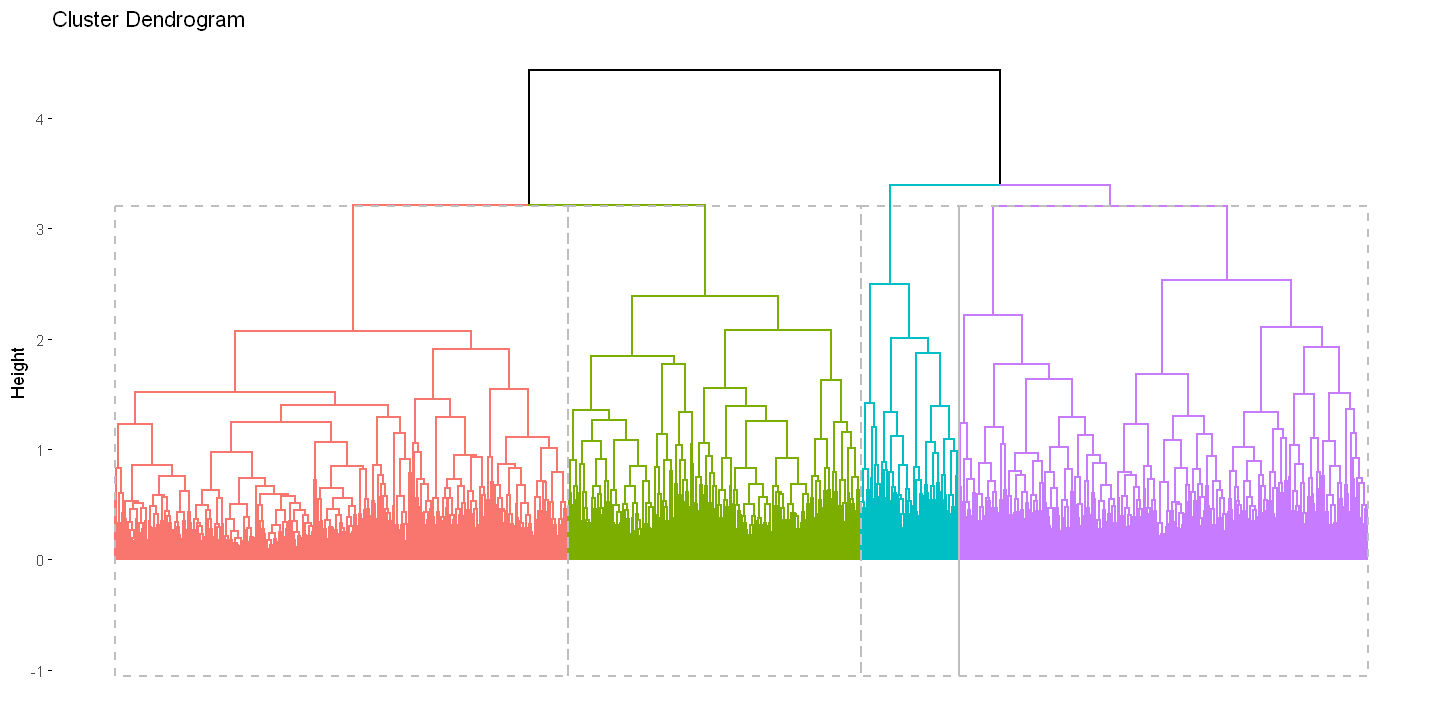

In [11]:
reshclust = cutree(hclustcomplete, 4)

# --- #

fviz_dend(hclustcomplete, k=4, show_labels=FALSE, rect=TRUE)

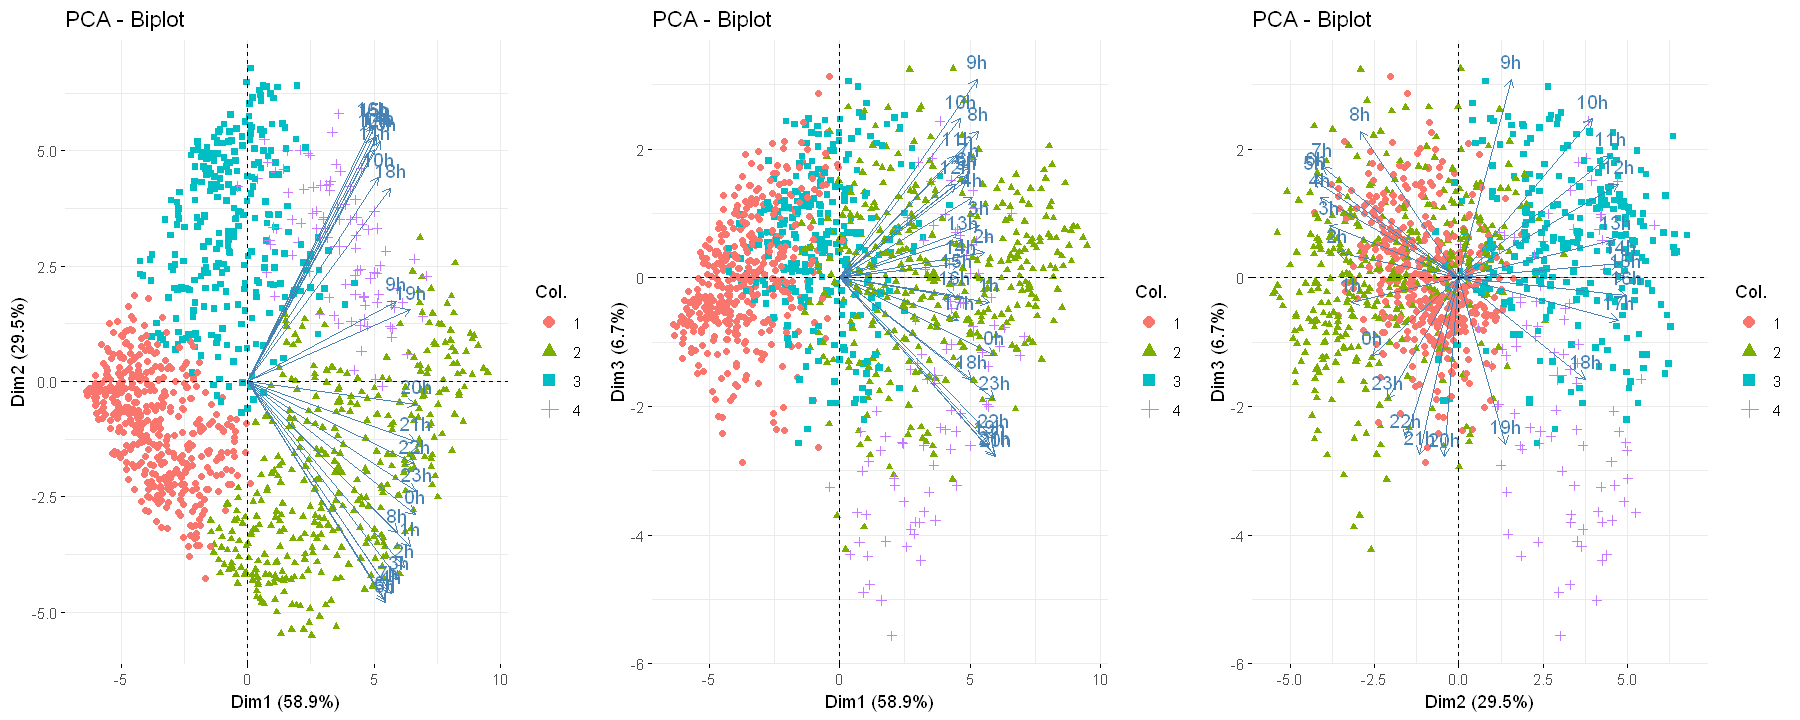

In [19]:
options(repr.plot.width = 15, repr.plot.height = 6)

grid.arrange(
    fviz_pca(acp1, axes=c(1,2), geom = c("point"), col.ind=as.factor(reshclust)),
    fviz_pca(acp1, axes=c(1,3), geom = c("point"), col.ind=as.factor(reshclust)),
    fviz_pca(acp1, axes=c(2,3), geom = c("point"), col.ind=as.factor(reshclust)),
    ncol=3
)

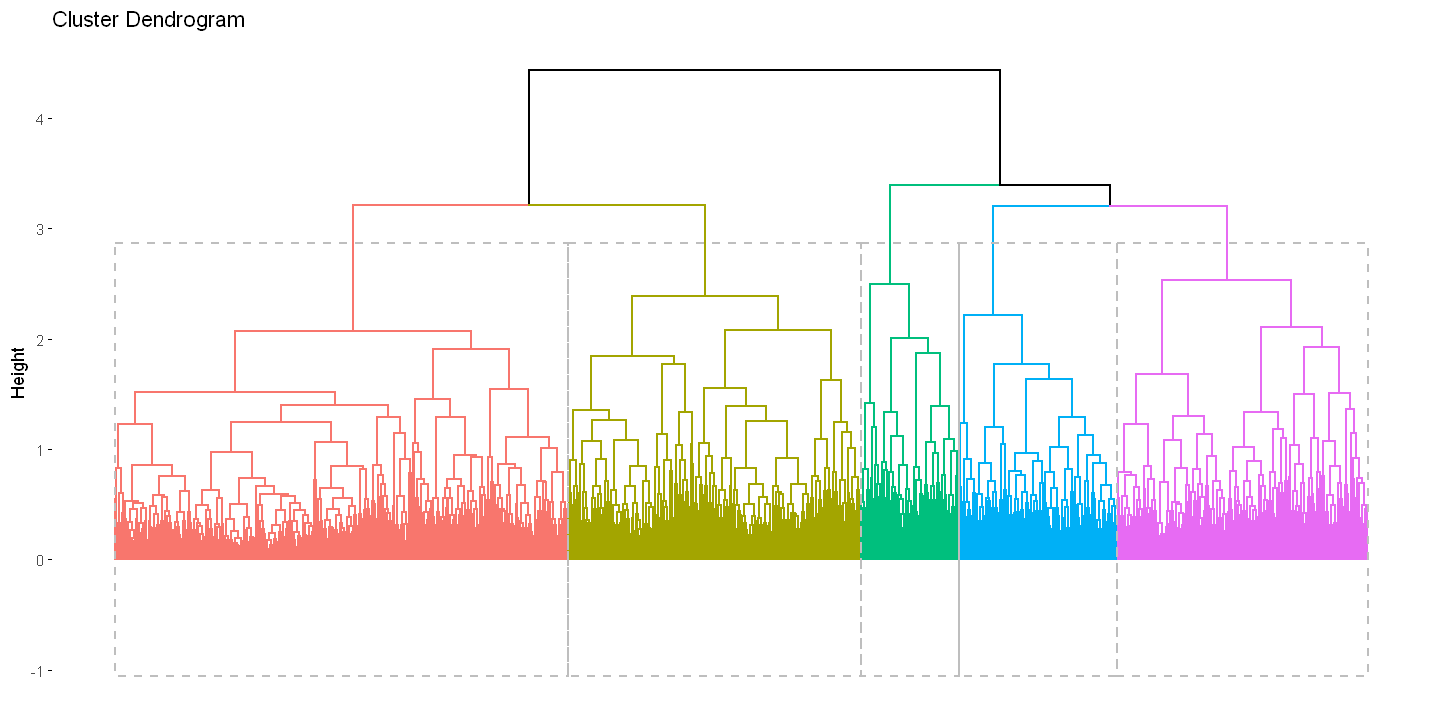

In [13]:
reshclust = cutree(hclustcomplete, 5)

# --- #

fviz_dend(hclustcomplete, k=5, show_labels=FALSE, rect=TRUE)

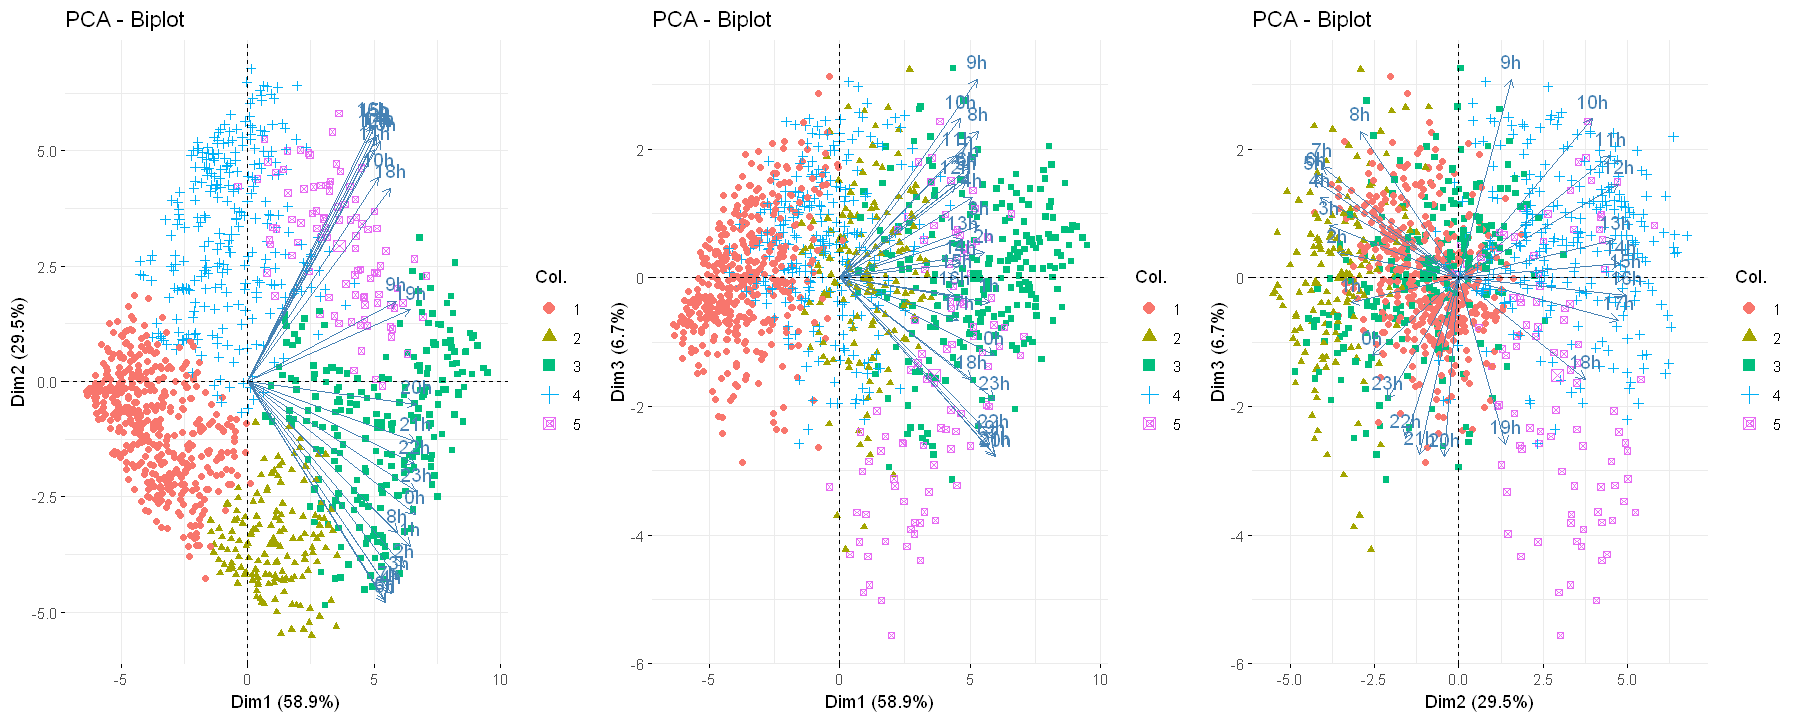

In [21]:
options(repr.plot.width = 15, repr.plot.height = 6)

grid.arrange(
    fviz_pca(acp1, axes=c(1,2), geom = c("point"), col.ind=as.factor(reshclust)),
    fviz_pca(acp1, axes=c(1,3), geom = c("point"), col.ind=as.factor(reshclust)),
    fviz_pca(acp1, axes=c(2,3), geom = c("point"), col.ind=as.factor(reshclust)),
    ncol=3
)

In [15]:
cluster_palette <- colorFactor(c("#E41A1C","#377EB8","#4DAF4A","#FF7F00","#984EA3"), domain = unique(reshclust))  # Utiliser la palette viridis avec 10 couleurs

leaflet(velib$position) %>% 
  addTiles(urlTemplate = "https://{s}.basemaps.cartocdn.com/light_all/{z}/{x}/{y}{r}.png", 
           attribution = 'Map tiles by Carto, under CC BY 3.0. Data by OpenStreetMap, under ODbL.') %>% 
  addCircleMarkers(radius = 3,
                   color = ~cluster_palette(reshclust),
                   stroke = FALSE, 
                   fillOpacity = 0.9) %>%
addLegend(position = "bottomright", 
            pal = cluster_palette, 
            values = ~reshclust,
            title = "Cluster",
            opacity = 1)

HTML widgets cannot be represented in plain text (need html)

In [16]:
library(mclust)

Package 'mclust' version 6.1
Type 'citation("mclust")' for citing this R package in publications.


Attachement du package : 'mclust'


L'objet suivant est masqué depuis 'package:purrr':

    map




Best BIC values:
            VVE,8       VVE,9       VVE,6
BIC      84605.56 84575.92732 84544.76628
BIC diff     0.00   -29.62948   -60.79053

---------------------------------------------------- 
Gaussian finite mixture model fitted by EM algorithm 
---------------------------------------------------- 

Mclust VVE (ellipsoidal, equal orientation) model with 8 components: 

 log-likelihood    n  df      BIC      ICL
       44664.25 1189 667 84605.56 84397.01

Clustering table:
  1   2   3   4   5   6   7   8 
162 229 326  65  85 131  90 101 

Warning message:
"`gather_()` was deprecated in tidyr 1.2.0.
ℹ Please use `gather()` instead.
ℹ The deprecated feature was likely used in the factoextra package.
  Please report the issue at <https://github.com/kassambara/factoextra/issues>."


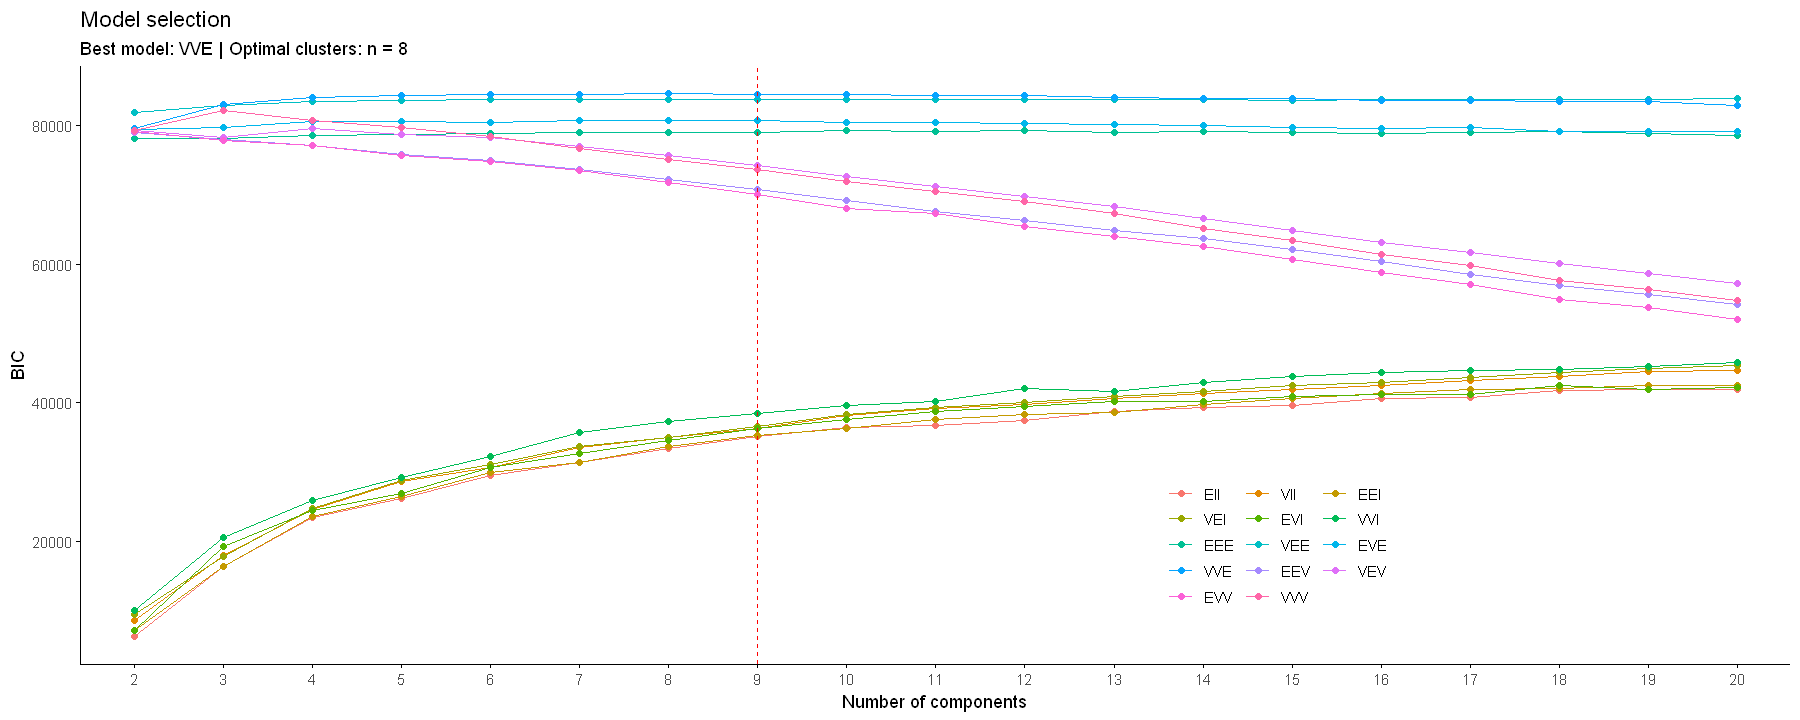

In [23]:
resBICall = mclustBIC(df1[,-c(25,26)], G=2:20)
summary(resBICall)

# --- #

resBICall = Mclust(df1[,-c(25,26)], G=2:20)
summary(resBICall)


fviz_mclust(resBICall, what="BIC")

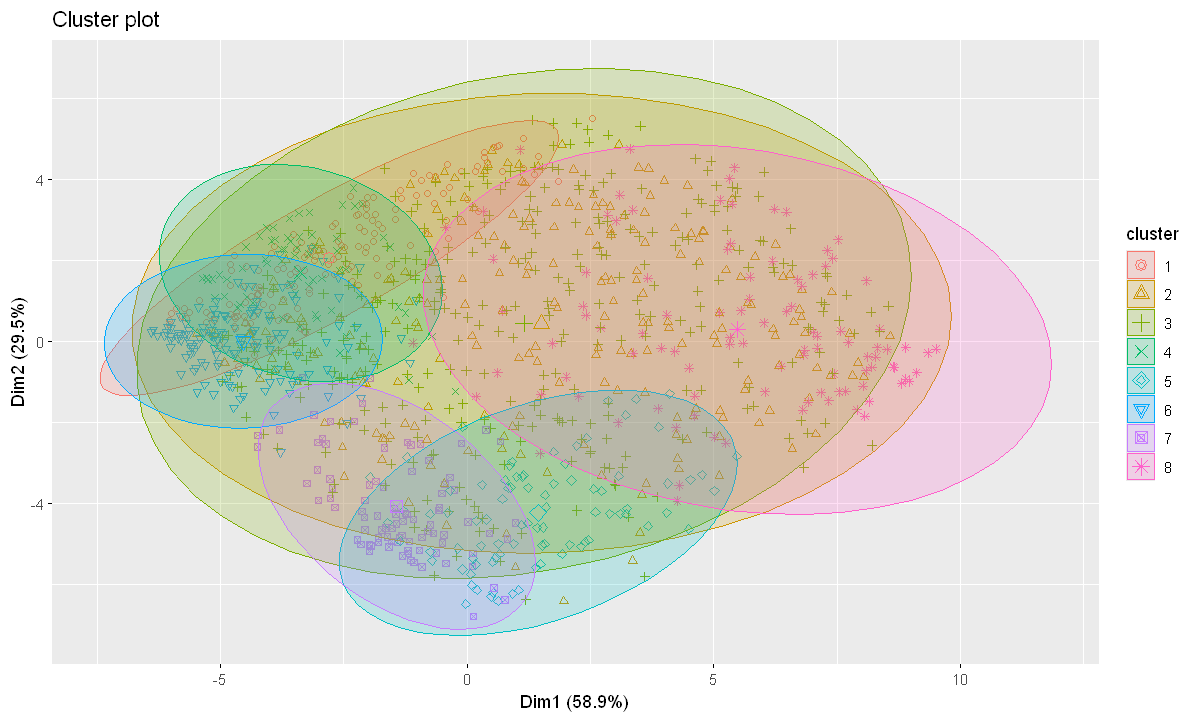

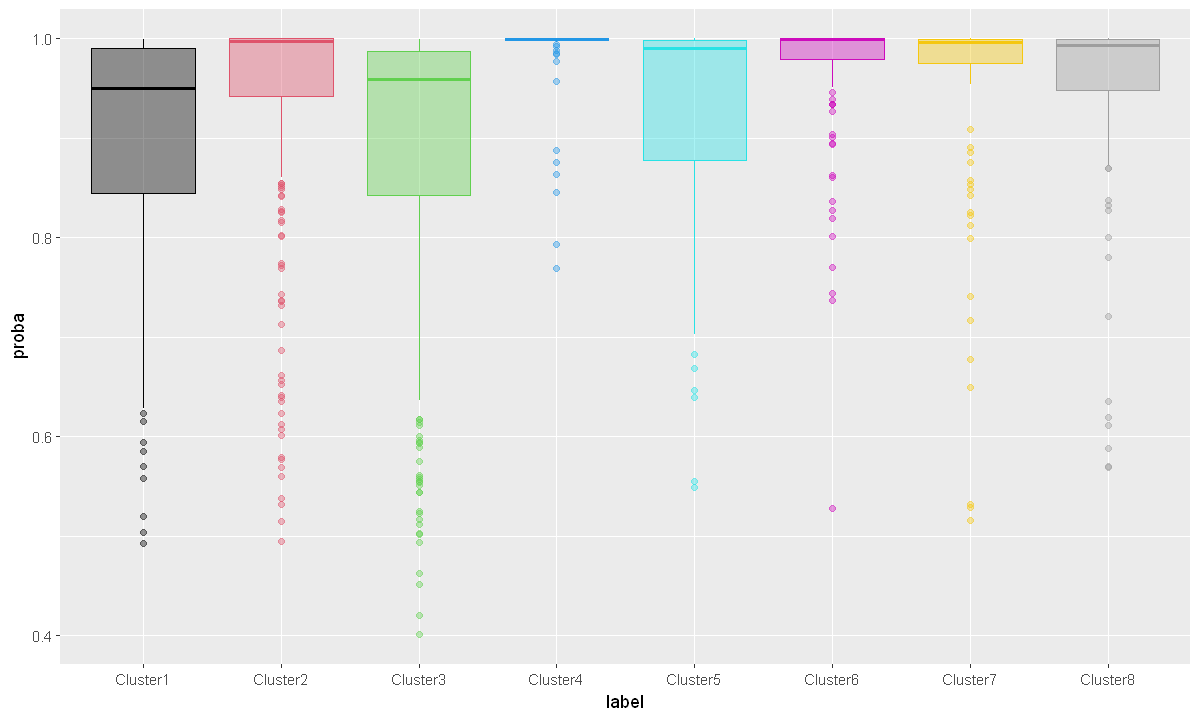

In [28]:
options(repr.plot.width = 10, repr.plot.height = 6)

resBIC = Mclust(df1[,-c(25,26)], G=8, modelNames = "VVE")
fviz_cluster(resBIC, data=df1[,-c(25,26)], ellipse.type="norm", geom="point")

# --- #

aux = data.frame(
    label = paste("Cluster", resBIC$classification, sep=""), 
    proba = apply(resBIC$z, 1, max))

ggplot(aux, aes(x=label, y=proba)) + 
    geom_boxplot(colour=1:8, fill=1:8, alpha=.4)

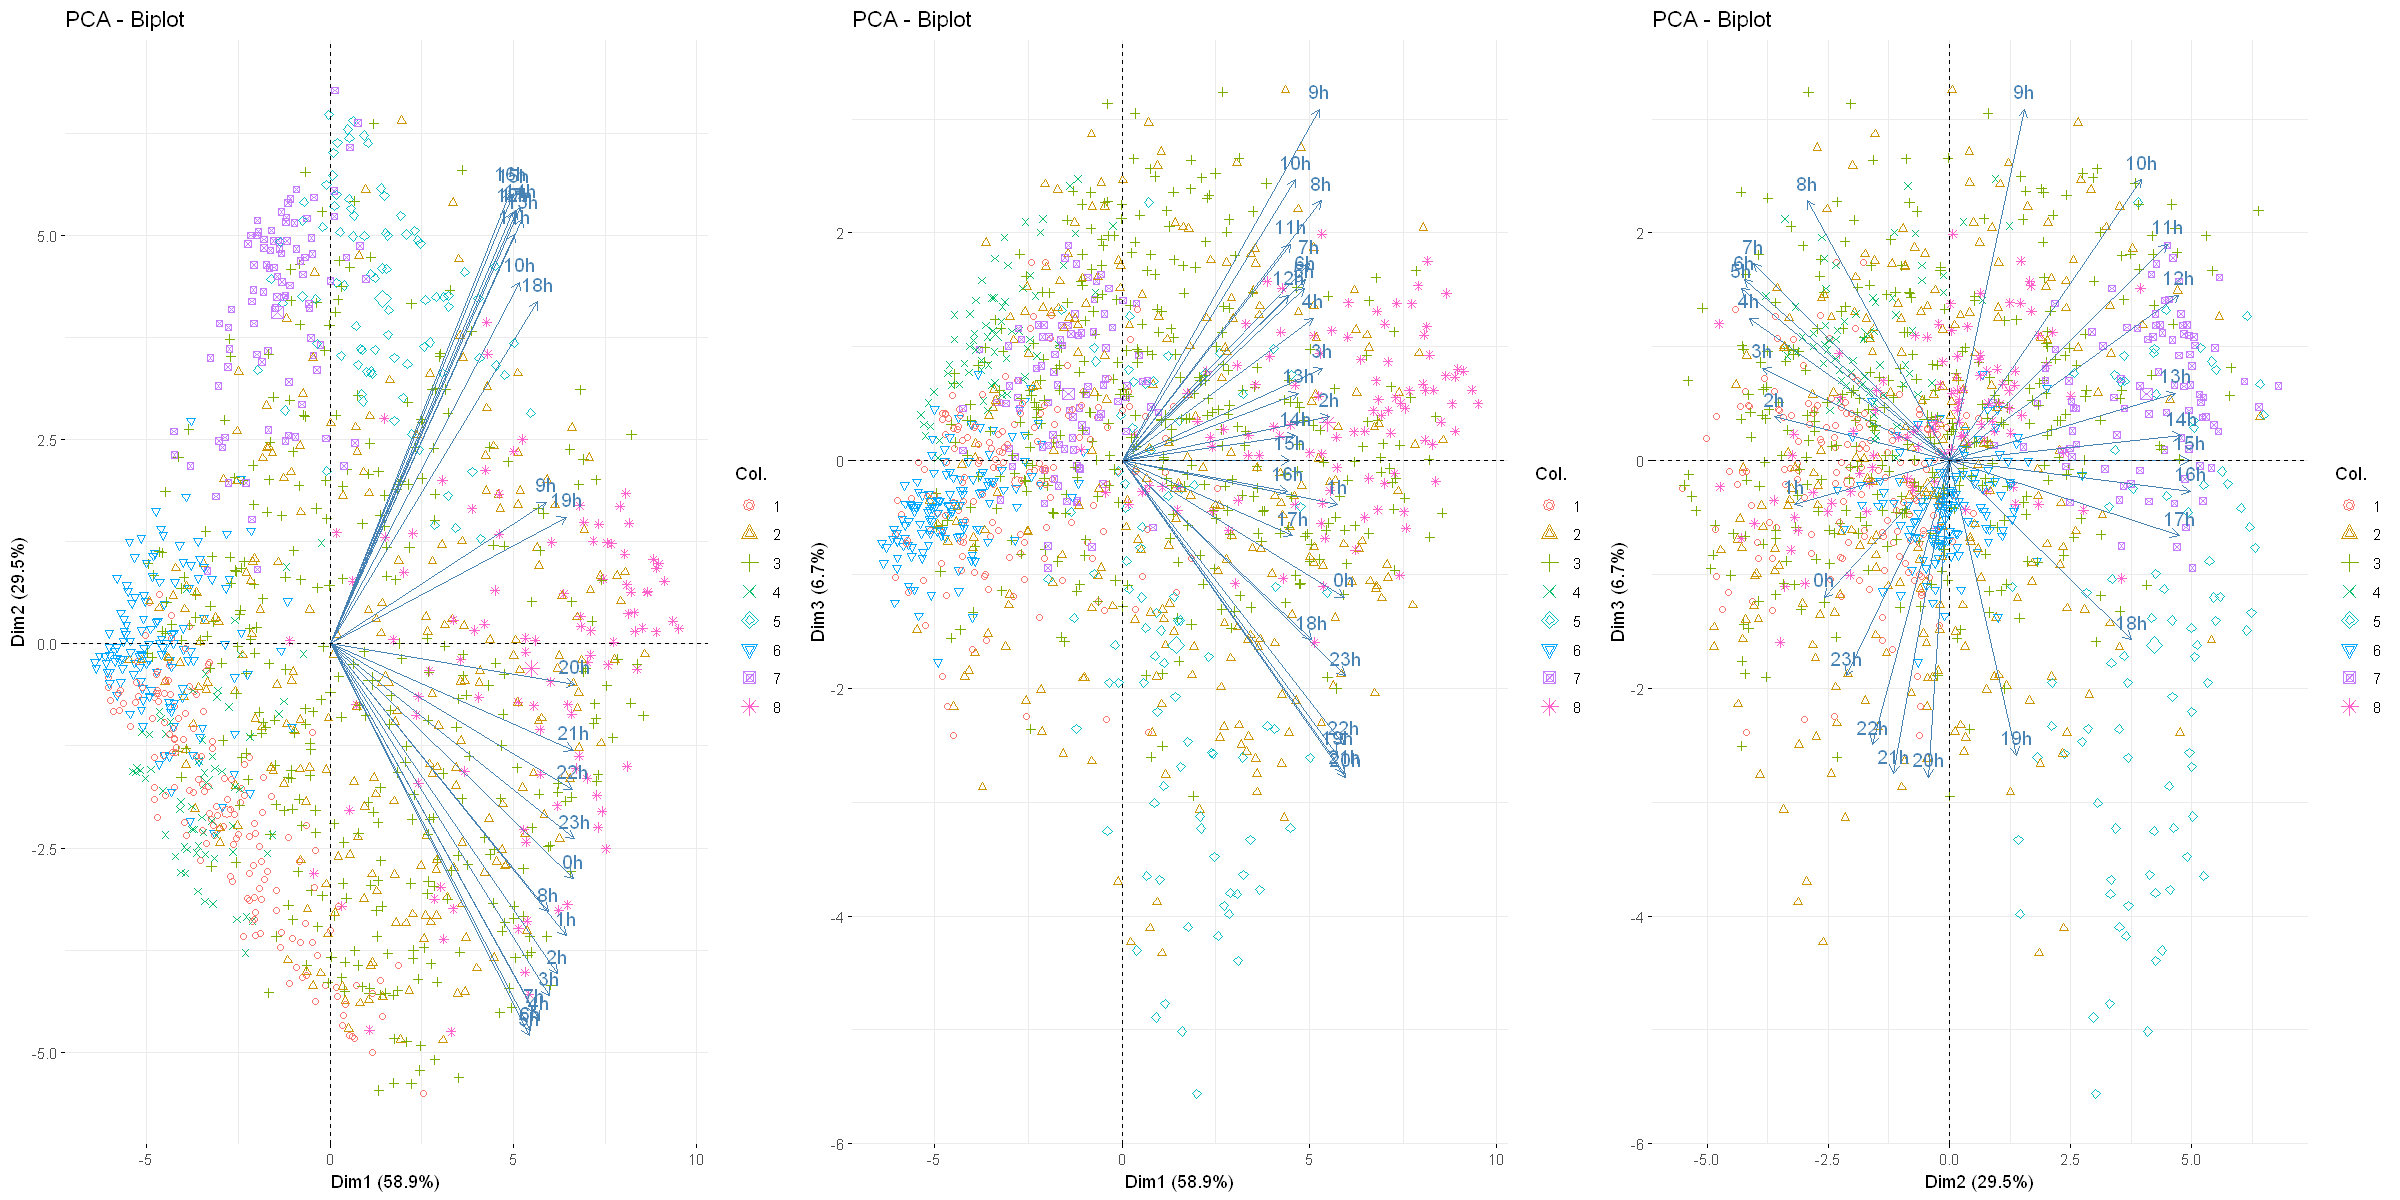

In [29]:
options(repr.plot.width = 20, repr.plot.height = 10)

grid.arrange(
    fviz_pca(acp1, axes=c(1,2), geom = c("point"), col.ind=as.factor(resBIC$classification)),
    fviz_pca(acp1, axes=c(1,3), geom=c("point"), col.ind=as.factor(resBIC$classification)),
    fviz_pca(acp1, axes=c(2,3), geom=c("point"), col.ind=as.factor(resBIC$classification)),
    ncol=3
)

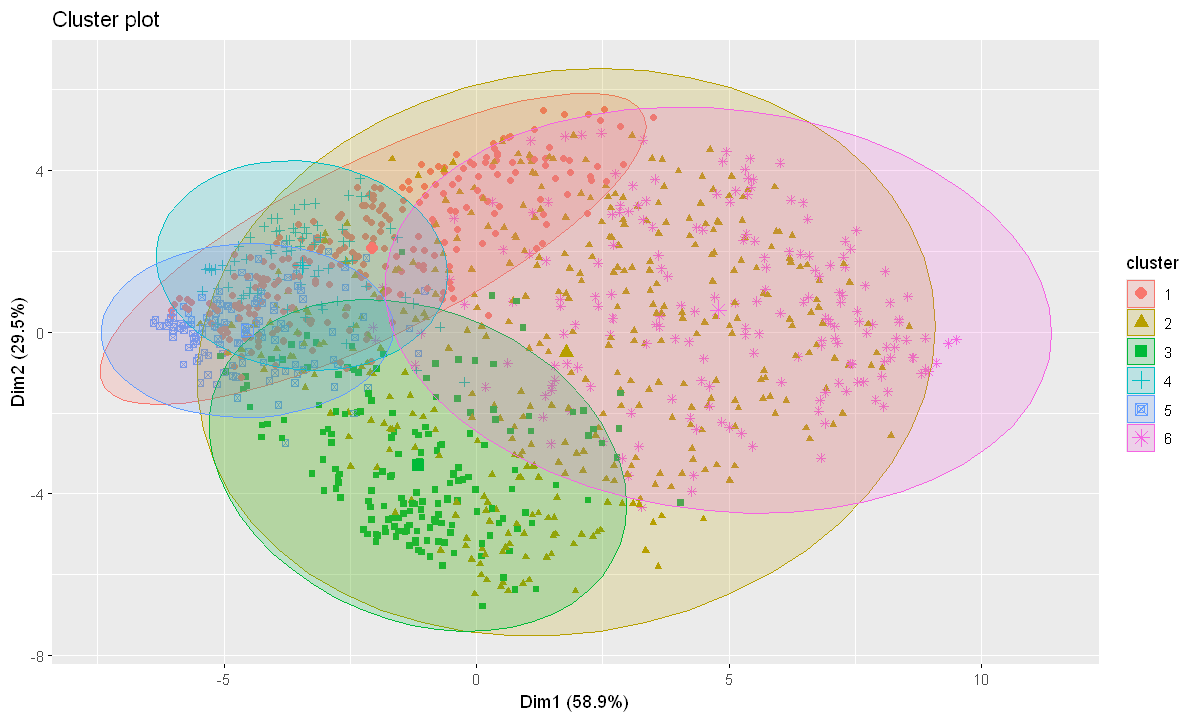

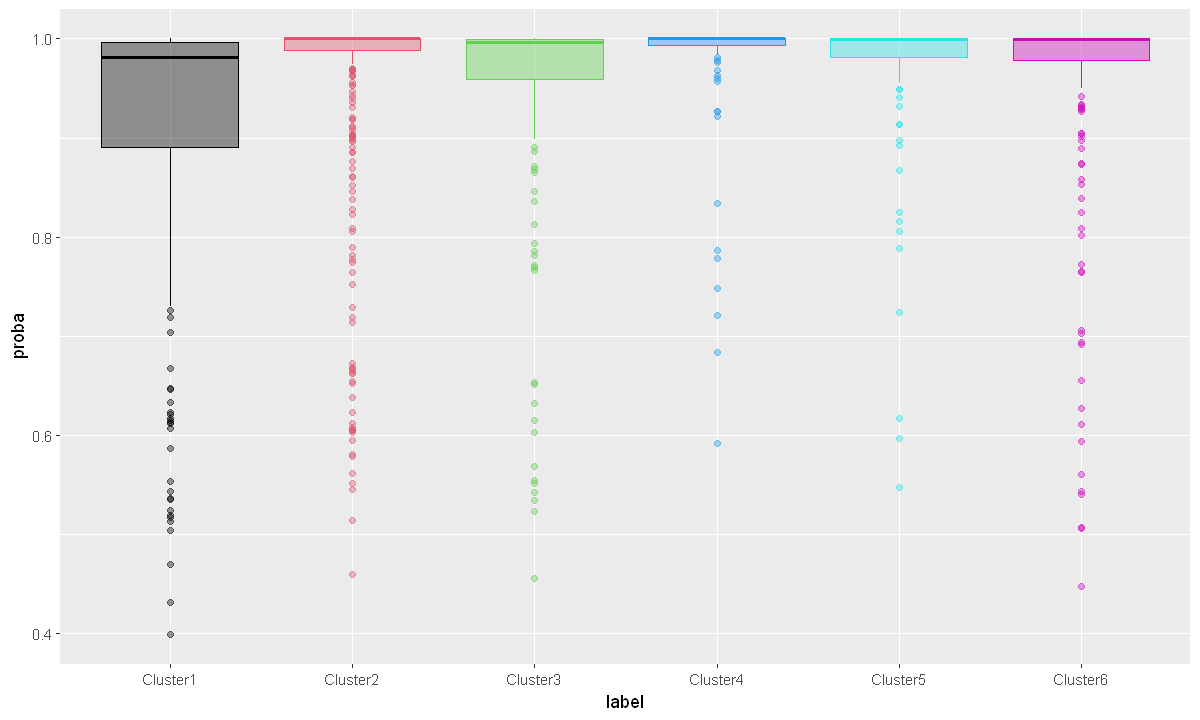

In [18]:
options(repr.plot.width = 10, repr.plot.height = 6)

resBIC = Mclust(df1[,-c(25,26)], G=6, modelNames = "VVE")
fviz_cluster(resBIC, data=df1[,-c(25,26)], ellipse.type="norm", geom="point")

# --- #

aux = data.frame(
    label = paste("Cluster", resBIC$classification, sep=""), 
    proba = apply(resBIC$z, 1, max))

ggplot(aux, aes(x=label, y=proba)) + 
    geom_boxplot(colour=1:6, fill=1:6, alpha=.4)

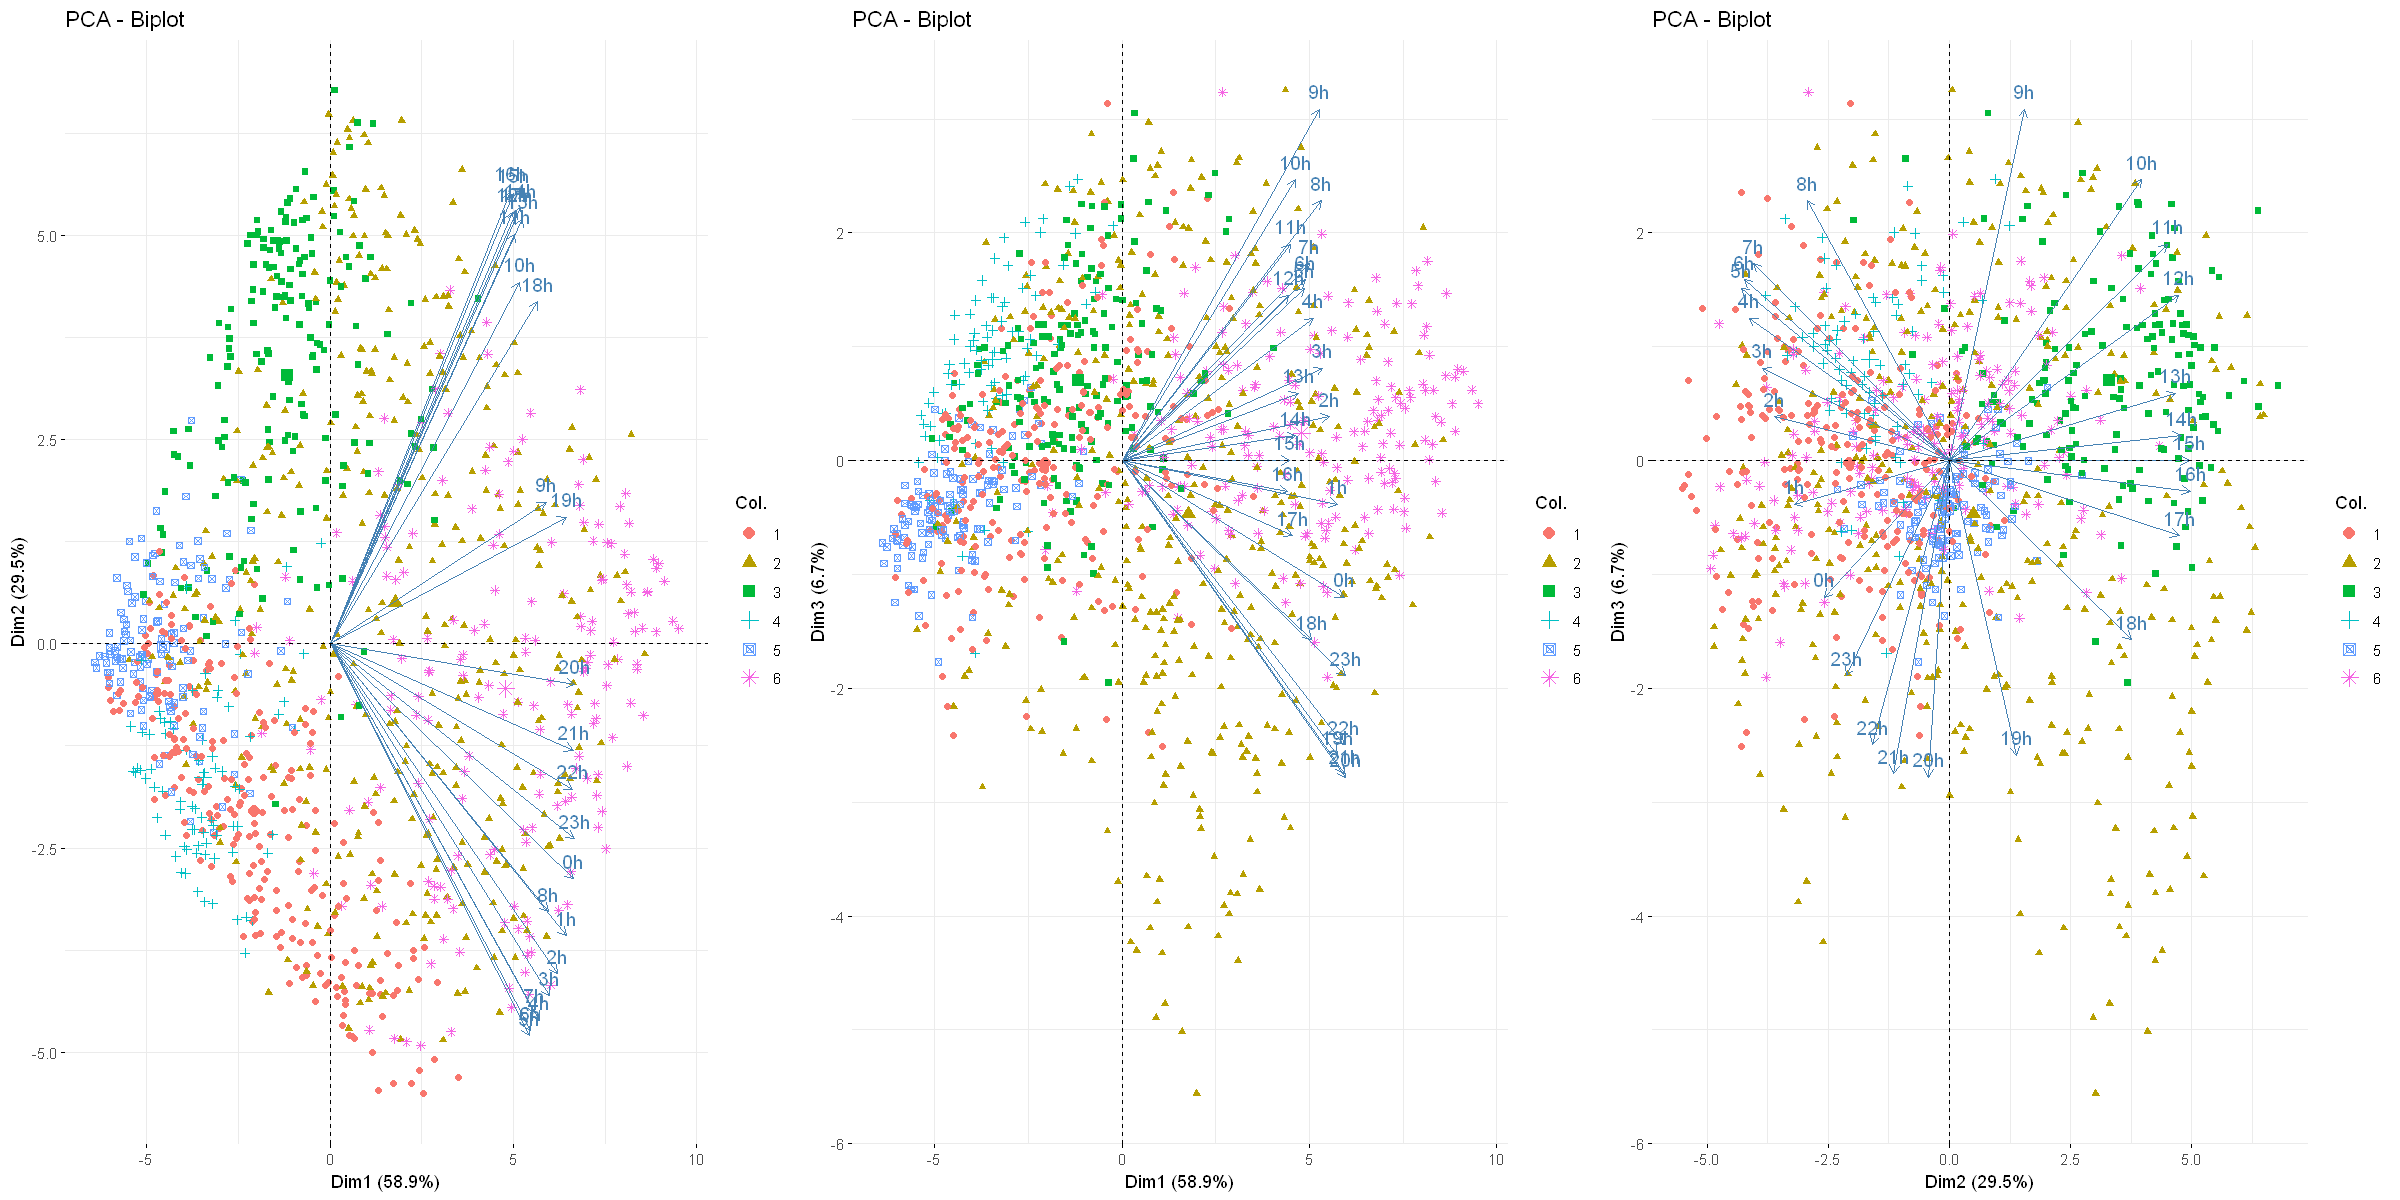

In [19]:
options(repr.plot.width = 20, repr.plot.height = 10)

grid.arrange(
    fviz_pca(acp1, axes=c(1,2), geom = c("point"), col.ind=as.factor(resBIC$classification)),
    fviz_pca(acp1, axes=c(1,3), geom=c("point"), col.ind=as.factor(resBIC$classification)),
    fviz_pca(acp1, axes=c(2,3), geom=c("point"), col.ind=as.factor(resBIC$classification)),
    ncol=3
)

In [20]:
cluster_palette <- colorFactor(c("#E41A1C","#377EB8","#4DAF4A","#FF7F00","#984EA3","#FF33CC"), domain = unique(resBIC$classification))  # Utiliser la palette viridis avec 10 couleurs

leaflet(velib$position) %>% 
  addTiles(urlTemplate = "https://{s}.basemaps.cartocdn.com/light_all/{z}/{x}/{y}{r}.png", 
           attribution = 'Map tiles by Carto, under CC BY 3.0. Data by OpenStreetMap, under ODbL.') %>% 
  addCircleMarkers(radius = 3,
                   color = ~cluster_palette(resBIC$classification),
                   stroke = FALSE, 
                   fillOpacity = 0.9) %>%
addLegend(position = "bottomright", 
            pal = cluster_palette, 
            values = ~resBIC$classification,
            title = "Cluster",
            opacity = 1)

HTML widgets cannot be represented in plain text (need html)